In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import statsmodels

In [2]:
print('Pandas version:',pd.__version__)
print('Numpy version:',np.__version__)
print('Seaborn version:',sns.__version__)
print('Matplotlib version:',matplotlib.__version__)
print('Statsmodels version:',statsmodels.__version__)

Pandas version: 1.1.3
Numpy version: 1.19.2
Seaborn version: 0.11.0
Matplotlib version: 3.3.2
Statsmodels version: 0.12.0


In [3]:
df = pd.read_csv('Sparkling.csv')
df.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [5]:
df['Time_Stamp']=pd.to_datetime(df['YearMonth'])
df.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-01
1   1980-02       1591 1980-02-01
2   1980-03       2304 1980-03-01
3   1980-04       1712 1980-04-01
4   1980-05       1471 1980-05-01

In [6]:
df.set_index(keys='Time_Stamp',drop=True,inplace=True)
df.head()

YearMonth  Sparkling
Time_Stamp                     
1980-01-01   1980-01       1686
1980-02-01   1980-02       1591
1980-03-01   1980-03       2304
1980-04-01   1980-04       1712
1980-05-01   1980-05       1471

In [7]:
df.drop('YearMonth',axis=1,inplace =True)

In [8]:
df.head()

Sparkling
Time_Stamp           
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [9]:
df.tail()

Sparkling
Time_Stamp           
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

# 1. Plot the Time series data

In [11]:
from pylab import rcParams

<AxesSubplot:xlabel='Time_Stamp'>

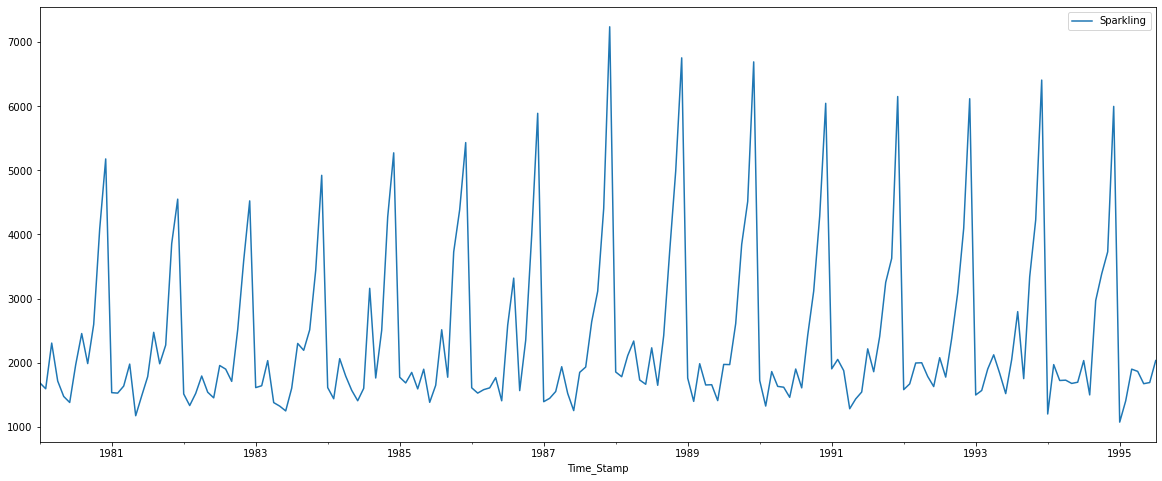

In [12]:
rcParams['figure.figsize'] = 20,8
df.plot()

# 2. Perform appropriate Exploratory Data Analysis to understand the data

In [13]:
df.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

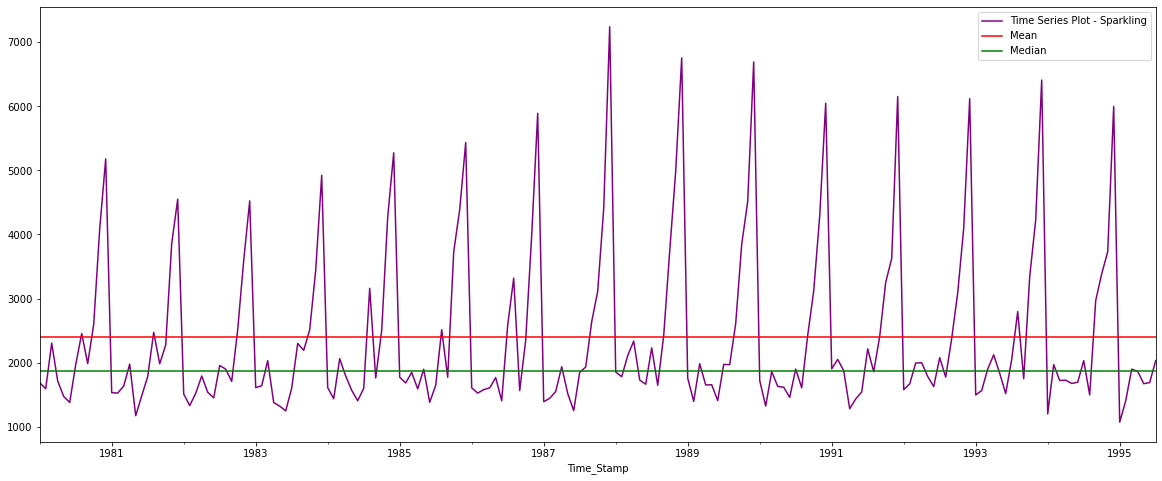

In [166]:
rcParams['figure.figsize'] = 20,8
df.plot(color='Purple')
plt.grid();
plt.axhline(df['Sparkling'].mean(),color='Red')
plt.axhline(df['Sparkling'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot - Sparkling','Mean','Median']);

# Plot a year on year boxplot for the Sparkling Wine Sales

C:\Users\kpriyadh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


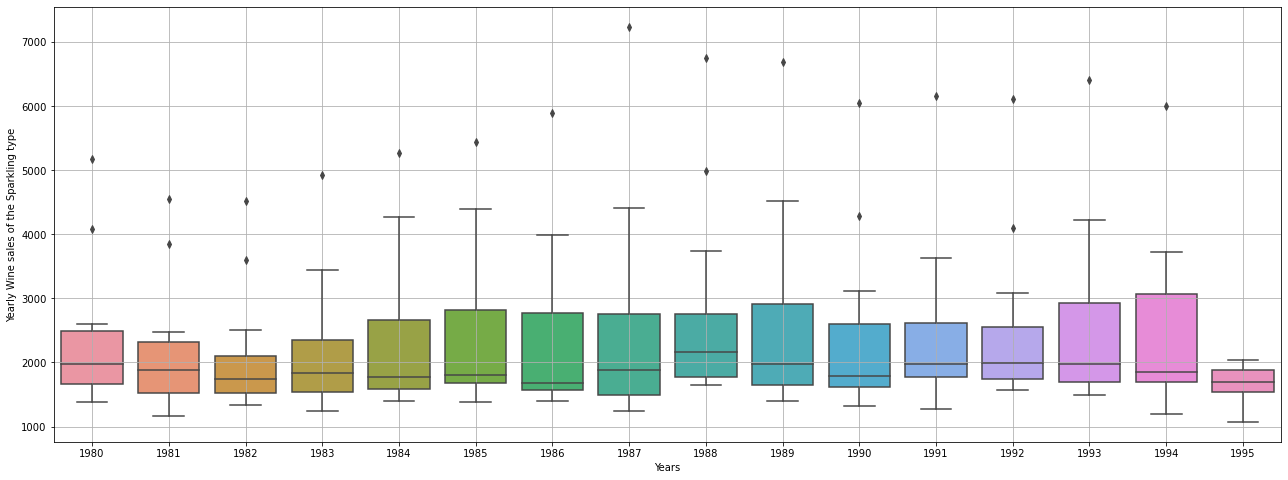

In [15]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df.index.year, df.Sparkling, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Wine sales of the Sparkling type');

As we got to know from the Time Series plot, the boxplots over here also indicates a measure of trend being present. Also, we see that the production of beer has some outliers for certain years

# Plot a quarterly comparison of the Sparkling Wine Sales using a barplot.

C:\Users\kpriyadh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


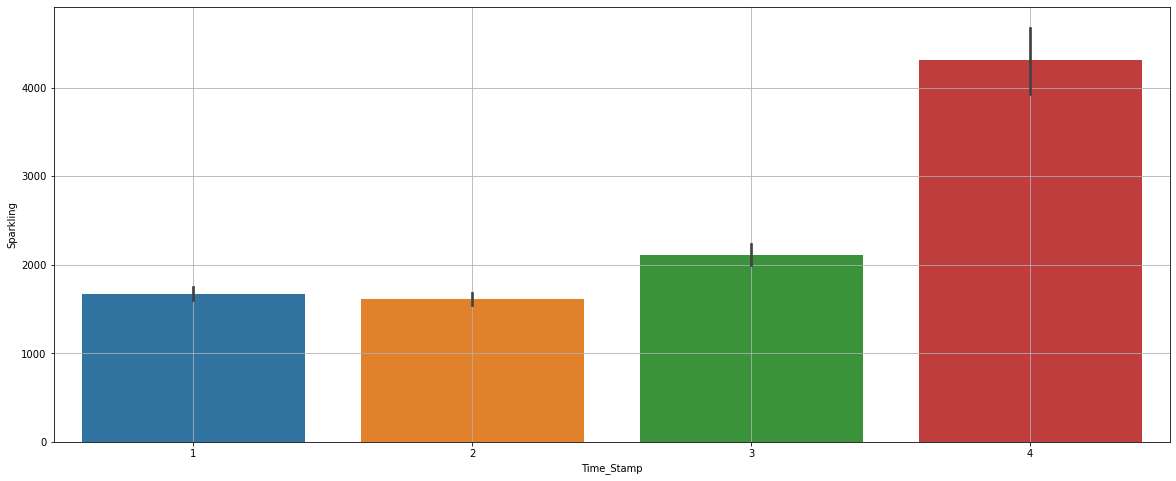

In [16]:
sns.barplot(df.index.quarter,df.Sparkling,data=df)
plt.grid();

# Plot a monthly boxplot for the wine sales taking all the years into account.

C:\Users\kpriyadh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


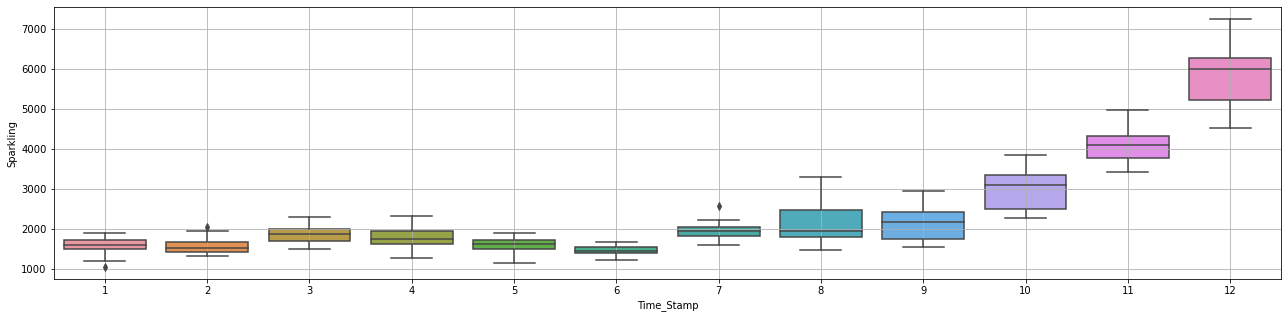

In [17]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(df.index.month, df.Sparkling, ax=ax,whis=1.5)
plt.grid();

The boxplots for the monthly production for different years does not show any outliers for all months except 'July'.

# Plot a monthplot of the given Time Series

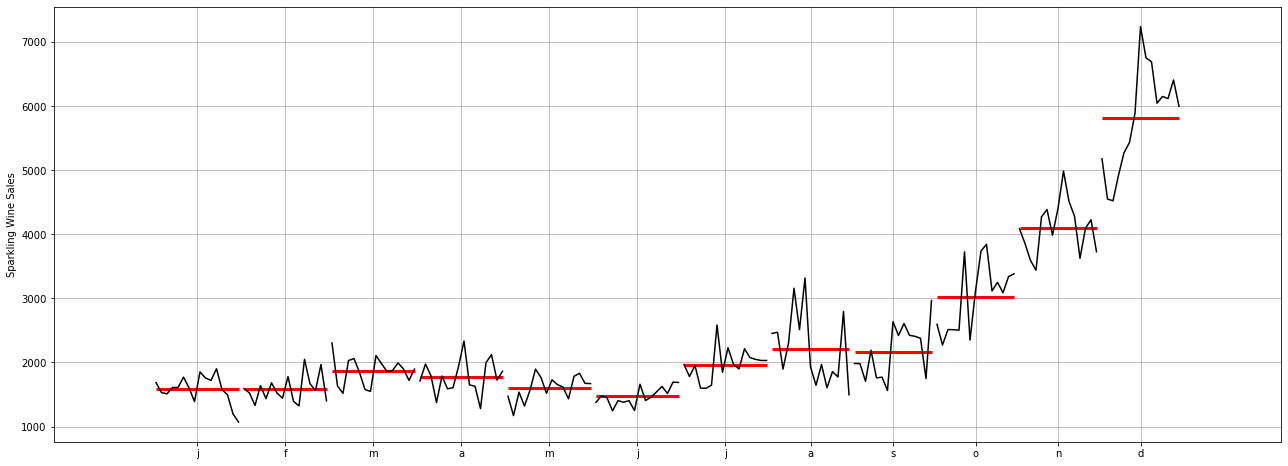

In [18]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df,ylabel='Sparkling Wine Sales',ax=ax)
plt.grid();

# Plot of yearly_sales_across_months

In [19]:
yearly_sales_across_months = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, 
                                        index = df.index.year)

yearly_sales_across_months

Time_Stamp      1       2       3       4       5       6       7       8   \
Time_Stamp                                                                   
1980        1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981        1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982        1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983        1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984        1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985        1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986        1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987        1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988        1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989        1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990        1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991        1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992        1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993        1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994        1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995        1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

Time_Stamp      9       10      11      12  
Time_Stamp                                  
1980        1984.0  2596.0  4087.0  5179.0  
1981        1981.0  2273.0  3857.0  4551.0  
1982        1706.0  2514.0  3593.0  4524.0  
1983        2191.0  2511.0  3440.0  4923.0  
1984        1759.0  2504.0  4273.0  5274.0  
1985        1771.0  3727.0  4388.0  5434.0  
1986        1562.0  2349.0  3987.0  5891.0  
1987        2638.0  3114.0  4405.0  7242.0  
1988        2421.0  3740.0  4988.0  6757.0  
1989        2608.0  3845.0  4514.0  6694.0  
1990        2424.0  3116.0  4286.0  6047.0  
1991        2408.0  3252.0  3627.0  6153.0  
1992        2377.0  3088.0  4096.0  6119.0  
1993        1749.0  3339.0  4227.0  6410.0  
1994        2968.0  3385.0  3729.0  5999.0  
1995           NaN     NaN     NaN     NaN

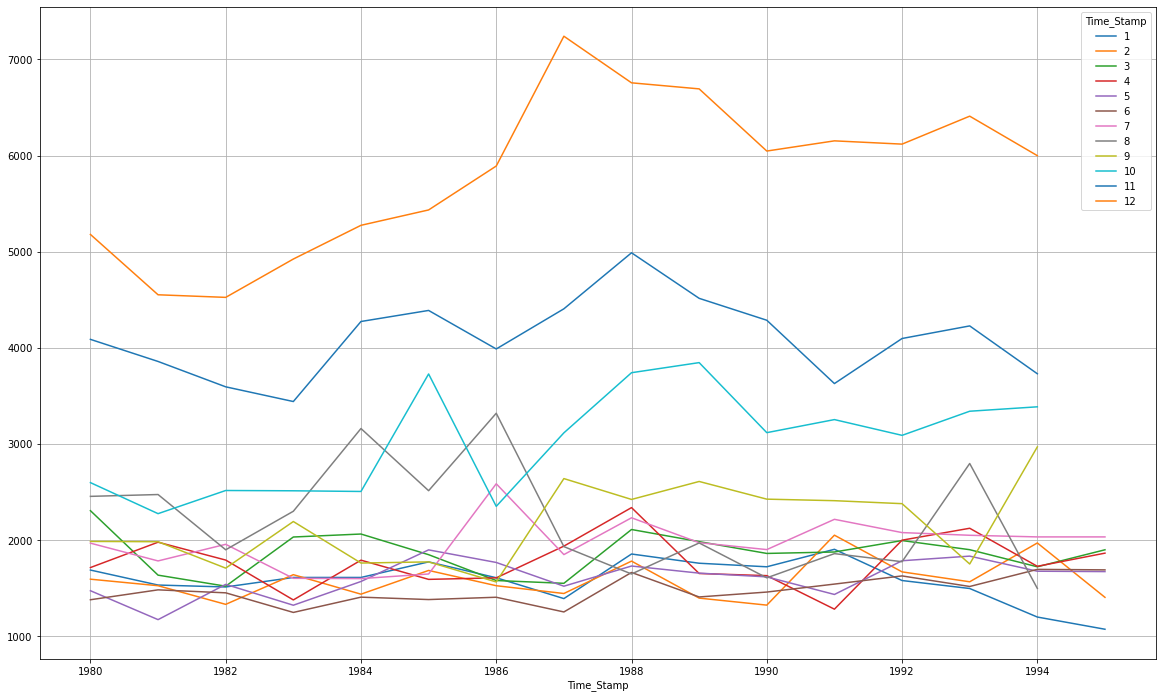

In [20]:
fig, ax = plt.subplots(figsize=(20,12))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

# Compare the Time Series plot by converting this monthly data into a quarterly and yearly format

### Yearly Plot

In [21]:
df_yearly_sum = df.resample('A').sum()
df_yearly_sum.head()

Sparkling
Time_Stamp           
1980-12-31      28406
1981-12-31      26227
1982-12-31      25321
1983-12-31      26180
1984-12-31      28431

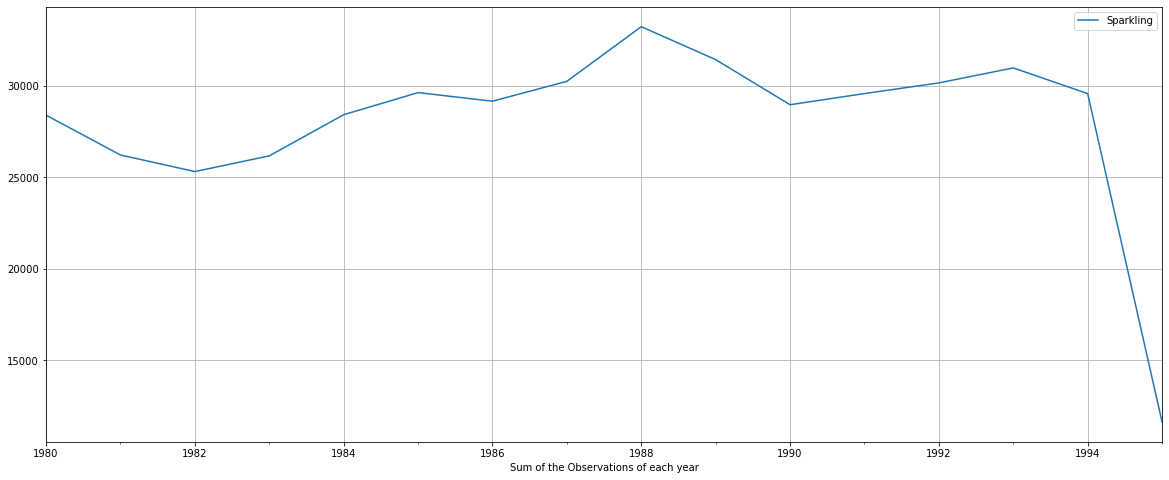

In [22]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

# Let us try to resample or aggregate the Time Series from an annual perspective and take the mean of the observations of the year considering each month as an observation.

In [23]:
df_yearly_mean = df.resample('Y').mean()
df_yearly_mean.head()

Sparkling
Time_Stamp             
1980-12-31  2367.166667
1981-12-31  2185.583333
1982-12-31  2110.083333
1983-12-31  2181.666667
1984-12-31  2369.250000

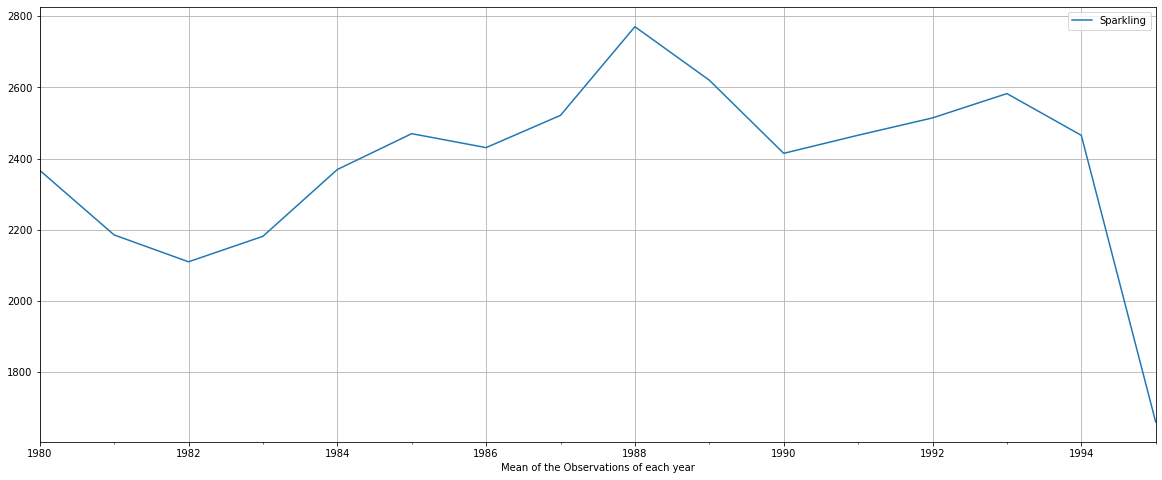

In [24]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

### Quarterly Plot

In [25]:
df_quarterly_sum = df.resample('Q').sum()
df_quarterly_sum.head()


Sparkling
Time_Stamp           
1980-03-31       5581
1980-06-30       4560
1980-09-30       6403
1980-12-31      11862
1981-03-31       4686

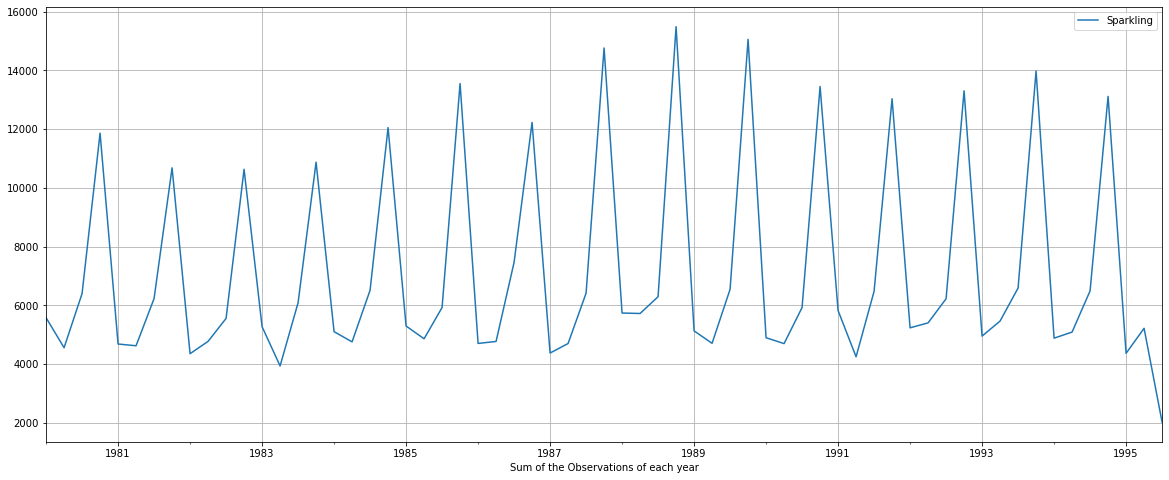

In [167]:
df_quarterly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [27]:
df_quarterly_mean = df.resample('Q').mean()
df_quarterly_mean.head()


Sparkling
Time_Stamp             
1980-03-31  1860.333333
1980-06-30  1520.000000
1980-09-30  2134.333333
1980-12-31  3954.000000
1981-03-31  1562.000000

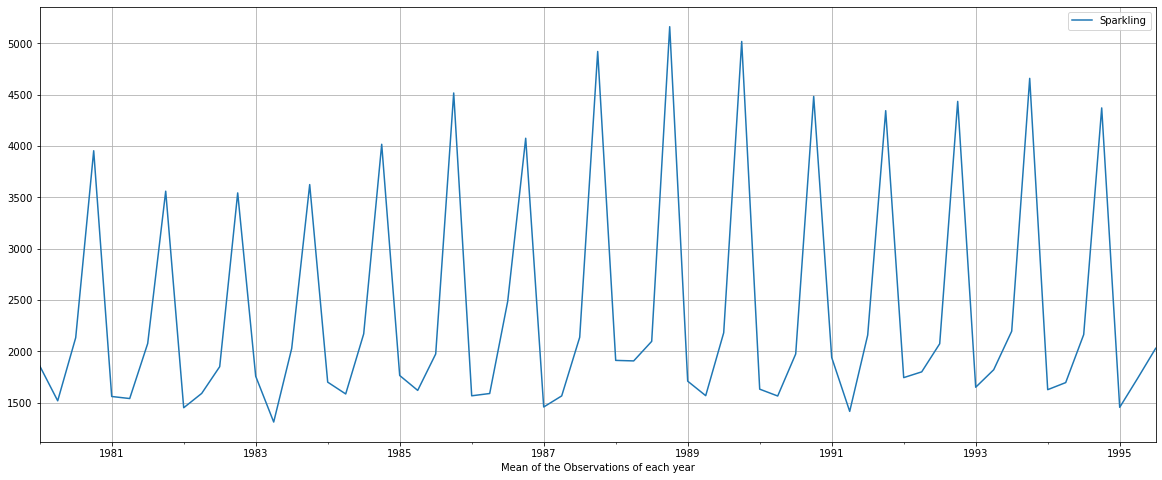

In [168]:
df_quarterly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

# Decompose the Time Series

### Additive Model

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

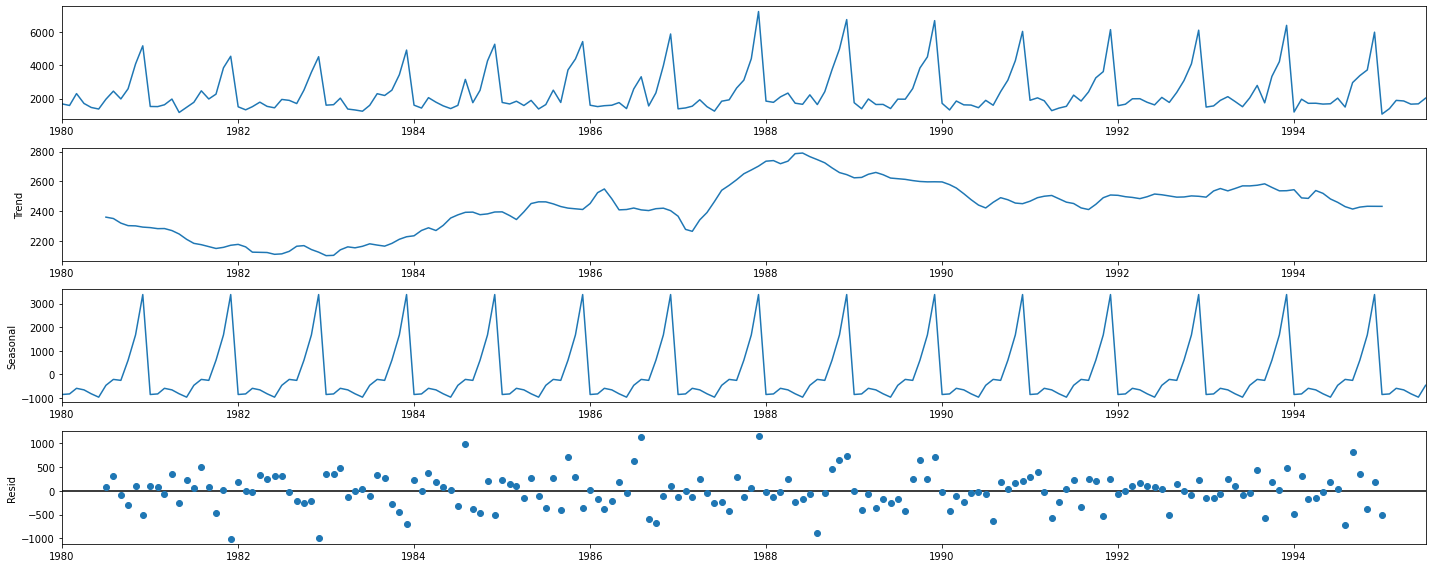

In [30]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

As per the 'additive' decomposition, we see that there is a pronounced seasonality in the data. As far as trend is concerned there is a steady increase in the sales where it reached a peak and the sales got saturated. 

### Multiplicative Model

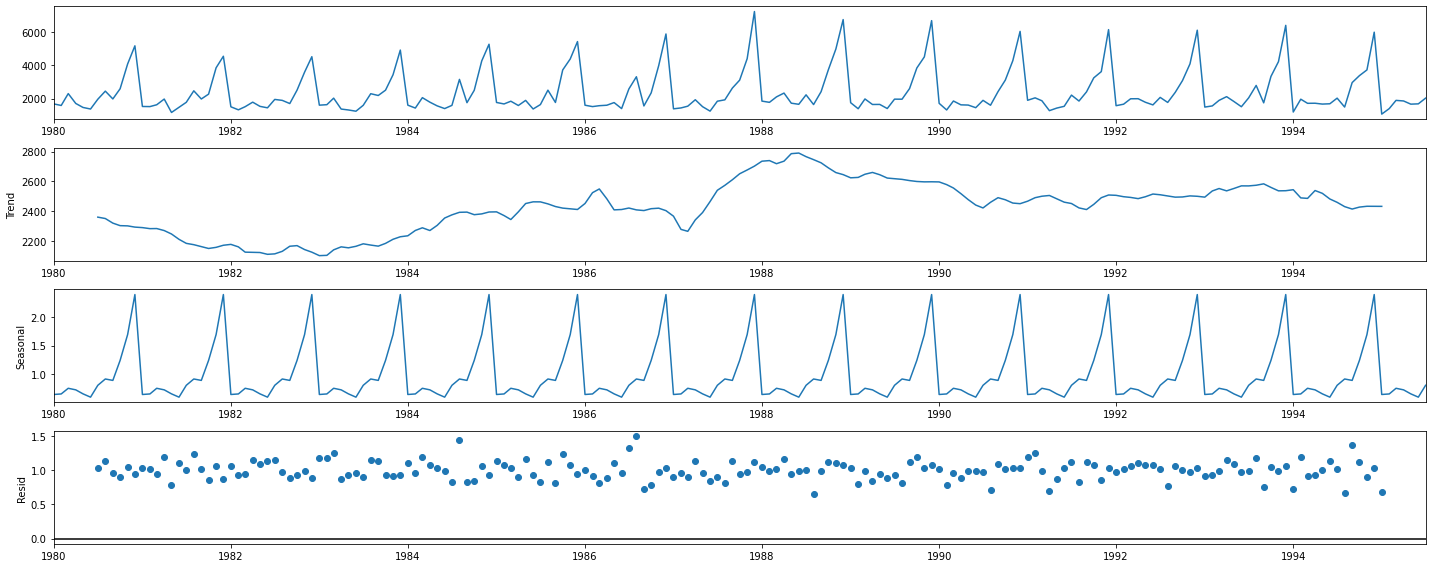

In [31]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

Multiplicative model is able to hande the residues well compared to the additive model. 

In [32]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [33]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: r

In [34]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

Time_Stamp
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2361.695896
1980-08-01    2352.468741
1980-09-01    2321.497620
1980-10-01    2304.490847
1980-11-01    2303.092089
1980-12-01    2294.738436
dtype: float64

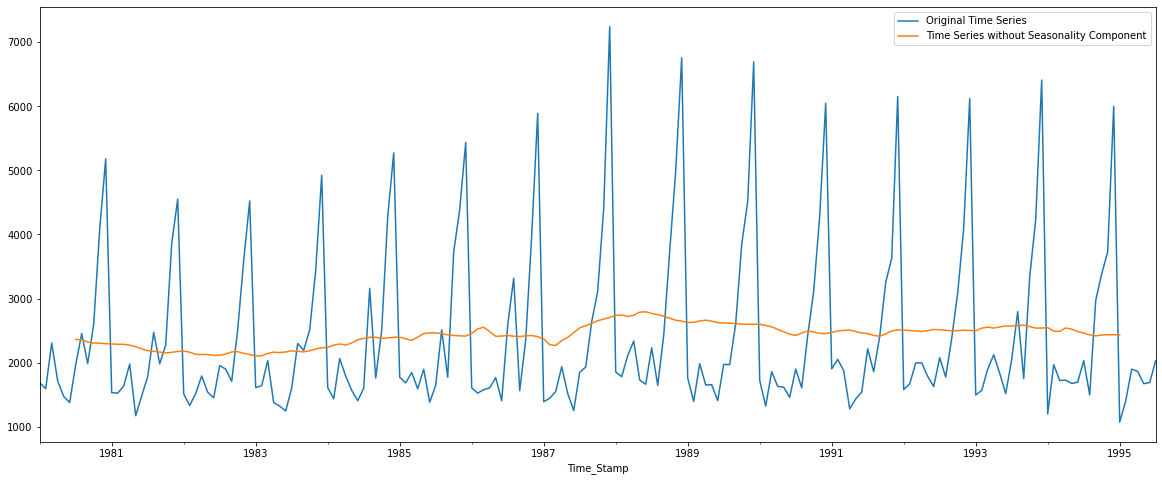

In [35]:
df.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

<AxesSubplot:>

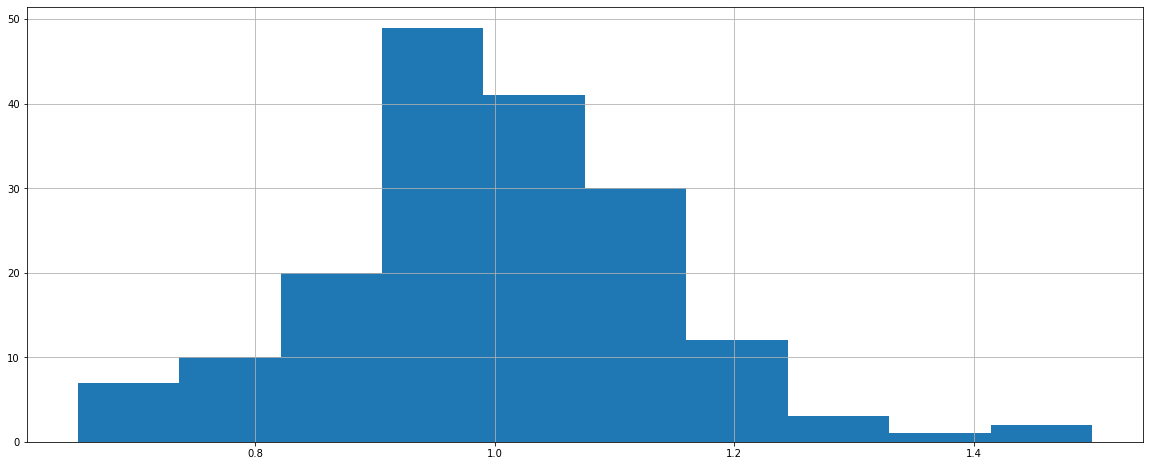

In [36]:
residual.hist()

# Missing value

In [37]:
df.isna().sum()

Sparkling    0
dtype: int64

# Split the data into training and test. The test data should start in 1991.

In [38]:
train             = df[df.index<'1991'] 
test              = df[df.index>='1991']

In [39]:
from IPython.display import display

In [40]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
Time_Stamp           
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Last few rows of Training Data


Sparkling
Time_Stamp           
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

First few rows of Test Data


Sparkling
Time_Stamp           
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

Last few rows of Test Data


Sparkling
Time_Stamp           
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

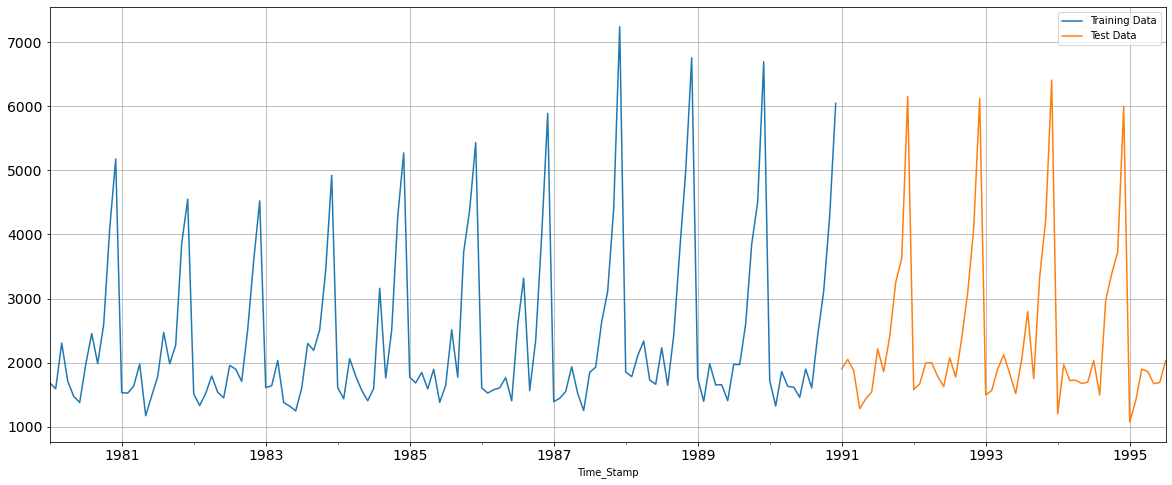

In [41]:
train['Sparkling'].plot(fontsize=14)
test['Sparkling'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Building various exponential smoothing models on the training data

### Simple Exponential Smoothing with additive errors

The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES).

This method is suitable for forecasting data with no clear trend or seasonal pattern.

Parameter  𝛼  is called the smoothing constant and its value lies between 0 and 1. Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.

SimpleExpSmoothing class must be instantiated and passed the training data.

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. If this is omitted or set to None, the model will automatically optimize the value.

In [42]:
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [43]:
SES_train = train.copy()
SES_test = test.copy()

In [44]:
# create class
model_SES = SimpleExpSmoothing(SES_train,initialization_method='estimated')

C:\Users\kpriyadh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [45]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

C:\Users\kpriyadh\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [46]:
print('')
print('== SIMPLE Exponential Smoothing Estimated Parameters ==')
print('')
model_SES_autofit.params


== SIMPLE Exponential Smoothing Estimated Parameters ==



{'smoothing_level': 0.07029120765764557,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1764.0137060346985,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Here, Python has not optimized the smoothing level and alpha (smoothing level) is negligible (0.07)

In [47]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-01    2804.675124
1991-02-01    2804.675124
1991-03-01    2804.675124
1991-04-01    2804.675124
1991-05-01    2804.675124
1991-06-01    2804.675124
1991-07-01    2804.675124
1991-08-01    2804.675124
1991-09-01    2804.675124
1991-10-01    2804.675124
1991-11-01    2804.675124
1991-12-01    2804.675124
1992-01-01    2804.675124
1992-02-01    2804.675124
1992-03-01    2804.675124
1992-04-01    2804.675124
1992-05-01    2804.675124
1992-06-01    2804.675124
1992-07-01    2804.675124
1992-08-01    2804.675124
1992-09-01    2804.675124
1992-10-01    2804.675124
1992-11-01    2804.675124
1992-12-01    2804.675124
1993-01-01    2804.675124
1993-02-01    2804.675124
1993-03-01    2804.675124
1993-04-01    2804.675124
1993-05-01    2804.675124
1993-06-01    2804.675124
1993-07-01    2804.675124
1993-08-01    2804.675124
1993-09-01    2804.675124
1993-10-01    2804.675124
1993-11-01    2804.675124
1993-12-01    2804.675124
1994-01-01    2804.675124
1994-02-01    2804.675124
1994-03-01  

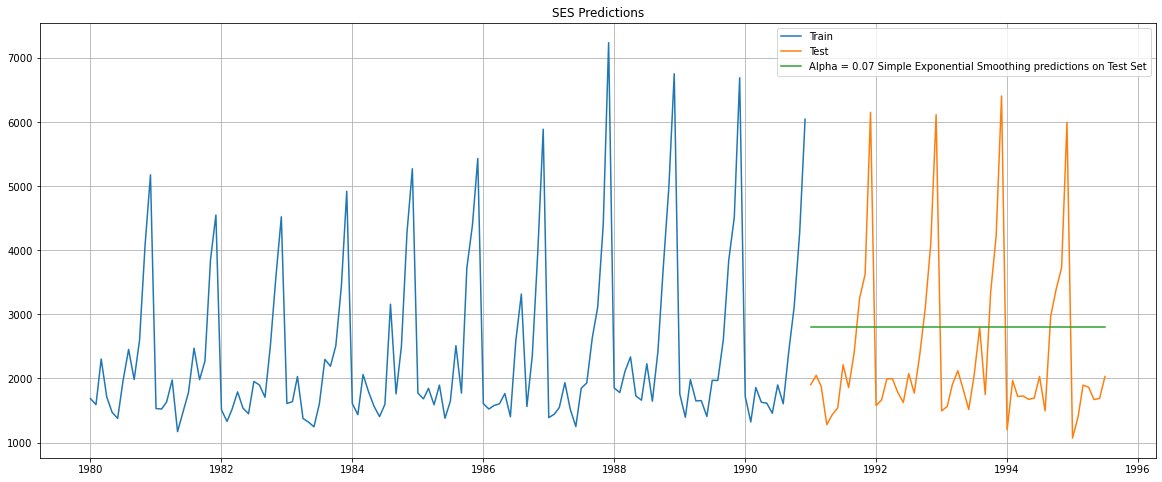

In [48]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label= 'Alpha = 0.07 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('SES Predictions');

# Evaluate the SES model using RMSE on the test data

In [49]:
SES_RMSE=mean_squared_error(SES_test.values,SES_predict.values,squared=False)
print('SES RMSE VALUE',SES_RMSE)

SES RMSE VALUE 1338.0083844916467


In [50]:
resultsDf = pd.DataFrame({'Test RMSE': [SES_RMSE]},index=['Alpha = 0.07 SES'])
resultsDf

Test RMSE
Alpha = 0.07 SES  1338.008384

# Holt - ETS(A, A, N) - Holt's linear method with additive errors

Double Exponential Smoothing
One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.
Applicable when data has Trend but no seasonality.
Two separate components are considered: Level and Trend.
Level is the local mean.
One smoothing parameter α corresponds to the level series
A second smoothing parameter β corresponds to the trend series.

In [51]:
DES_train = train.copy()
DES_test = test.copy()

In [52]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(DES_train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit(optimized=True,use_brute=True)

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
model_DES.params


==Holt model Exponential Smoothing Estimated Parameters ==



C:\Users\kpriyadh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\kpriyadh\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.6649999999999999,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1502.1999999999991,
 'initial_trend': 74.87272727272739,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [53]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01    5401.733026
1991-02-01    5476.005230
1991-03-01    5550.277433
1991-04-01    5624.549637
1991-05-01    5698.821840
1991-06-01    5773.094044
1991-07-01    5847.366248
1991-08-01    5921.638451
1991-09-01    5995.910655
1991-10-01    6070.182858
1991-11-01    6144.455062
1991-12-01    6218.727266
1992-01-01    6292.999469
1992-02-01    6367.271673
1992-03-01    6441.543876
1992-04-01    6515.816080
1992-05-01    6590.088284
1992-06-01    6664.360487
1992-07-01    6738.632691
1992-08-01    6812.904894
1992-09-01    6887.177098
1992-10-01    6961.449302
1992-11-01    7035.721505
1992-12-01    7109.993709
1993-01-01    7184.265912
1993-02-01    7258.538116
1993-03-01    7332.810320
1993-04-01    7407.082523
1993-05-01    7481.354727
1993-06-01    7555.626930
1993-07-01    7629.899134
1993-08-01    7704.171338
1993-09-01    7778.443541
1993-10-01    7852.715745
1993-11-01    7926.987948
1993-12-01    8001.260152
1994-01-01    8075.532356
1994-02-01    8149.804559
1994-03-01  

Text(0.5, 1.0, 'Simple and Double Exponential Smoothing Predictions')

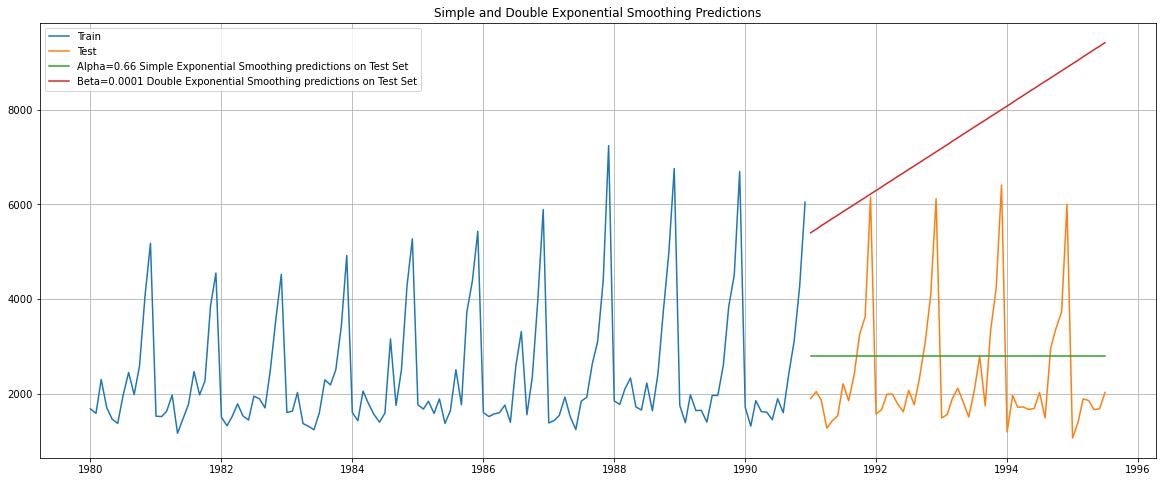

In [54]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.66 Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Beta=0.0001 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions')

We see that the double exponential smoothing is picking up the trend component

# Evaluate the DES model using RMSE on the test data

In [55]:
DES_RMSE=mean_squared_error(DES_test.values,DES_predict.values,squared=False)
print('DES RMSE VALUE',DES_RMSE)

DES RMSE VALUE 5291.8798332269125


In [56]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [DES_RMSE]},index=['Alpha=0.66,Beta=0.0001 DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha = 0.07 SES            1338.008384
Alpha=0.66,Beta=0.0001 DES  5291.879833

# Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [57]:
TES_train = train.copy()
TES_test = test.copy()

In [58]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(TES_train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit(optimized=True,use_brute=True)

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
model_TES.params

C:\Users\kpriyadh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==



{'smoothing_level': 0.11127217746964548,
 'smoothing_trend': 0.012360783178126748,
 'smoothing_seasonal': 0.46071776538894016,
 'damping_trend': nan,
 'initial_level': 2356.578364436942,
 'initial_trend': -0.018474239476475418,
 'initial_seasons': array([-636.23349217, -722.98352055, -398.6435547 , -473.43067518,
        -808.42508553, -815.35030575, -384.23066985,   72.99524975,
        -237.44267238,  272.32595851, 1541.37820976, 2590.07753817]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [59]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-01    1490.574551
1991-02-01    1204.714462
1991-03-01    1688.941256
1991-04-01    1551.450972
1991-05-01    1461.440602
1991-06-01    1278.907350
1991-07-01    1805.164222
1991-08-01    1679.251604
1991-09-01    2315.687875
1991-10-01    3225.309145
1991-11-01    4299.652613
1991-12-01    6411.161656
1992-01-01    1483.296915
1992-02-01    1197.436826
1992-03-01    1681.663620
1992-04-01    1544.173336
1992-05-01    1454.162966
1992-06-01    1271.629714
1992-07-01    1797.886586
1992-08-01    1671.973968
1992-09-01    2308.410239
1992-10-01    3218.031509
1992-11-01    4292.374977
1992-12-01    6403.884020
1993-01-01    1476.019279
1993-02-01    1190.159190
1993-03-01    1674.385984
1993-04-01    1536.895700
1993-05-01    1446.885330
1993-06-01    1264.352078
1993-07-01    1790.608950
1993-08-01    1664.696332
1993-09-01    2301.132603
1993-10-01    3210.753873
1993-11-01    4285.097341
1993-12-01    6396.606384
1994-01-01    1468.741643
1994-02-01    1182.881554
1994-03-01  

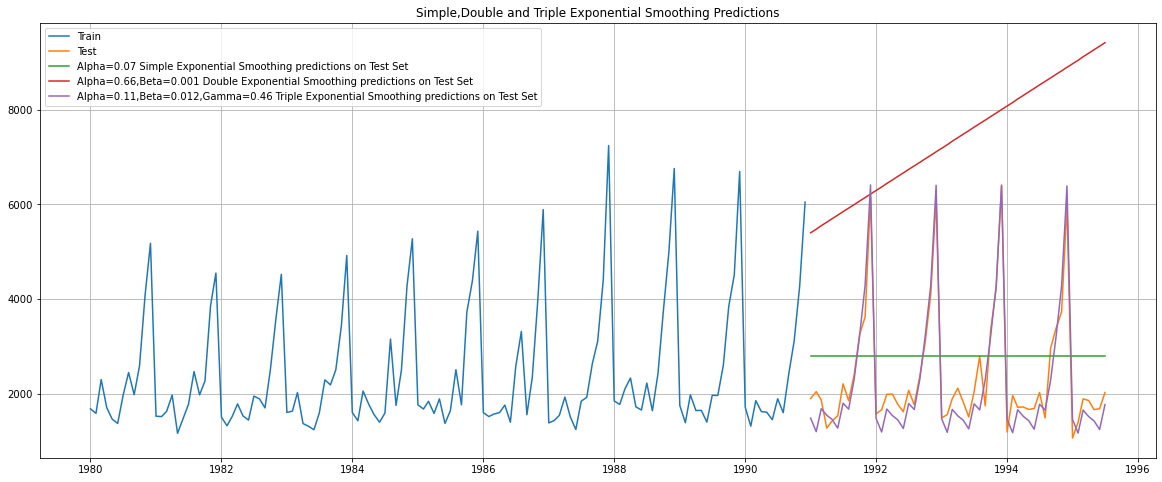

In [60]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.07 Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.66,Beta=0.001 Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.11,Beta=0.012,Gamma=0.46 Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

# Evaluate the TES model using RMSE on the test data

In [61]:
TES_RMSE=mean_squared_error(TES_test.values,TES_predict.values,squared=False)
print('TES RMSE VALUE',TES_RMSE)

TES RMSE VALUE 378.6260083329619


In [62]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [TES_RMSE]},index=['Alpha=0.11,Beta=0.012,Gamma=0.46 TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha = 0.07 SES                      1338.008384
Alpha=0.66,Beta=0.0001 DES            5291.879833
Alpha=0.11,Beta=0.012,Gamma=0.46 TES   378.626008

### INFERENCE

Triple Exponential Smoothing has performed the best on the test as expected since the data had both trend and seasonality.

But we see that our triple exponential smoothing is under forecasting. Let us try to tweak some of the parameters in order to get a better forecast on the test set.

# Holt-Winters - ETS(A, A, M) - Holt Winter's linear method with 'multiplicative'errors

In [63]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(TES_train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit(optimized=True,use_brute=True)

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters with multiplicative errors ==')
print('')
model_TES_am.params

C:\Users\kpriyadh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters with multiplicative errors ==



{'smoothing_level': 0.11101523064586813,
 'smoothing_trend': 0.0493150519338607,
 'smoothing_seasonal': 0.3624464792152574,
 'damping_trend': nan,
 'initial_level': 2356.4981157471807,
 'initial_trend': -9.804740061967985,
 'initial_seasons': array([0.71351261, 0.68262962, 0.90447098, 0.80523467, 0.65565848,
        0.65382021, 0.88609683, 1.13334681, 0.91877227, 1.21174825,
        1.87063097, 2.37421776]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [64]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am



1991-01-01    1587.921914
1991-02-01    1356.650344
1991-03-01    1763.350219
1991-04-01    1656.523868
1991-05-01    1542.386219
1991-06-01    1355.480857
1991-07-01    1854.708560
1991-08-01    1820.665822
1991-09-01    2277.675614
1991-10-01    3123.118775
1991-11-01    4130.016056
1991-12-01    5893.139956
1992-01-01    1539.025473
1992-02-01    1314.767912
1992-03-01    1708.771760
1992-04-01    1605.119264
1992-05-01    1494.399399
1992-06-01    1313.199426
1992-07-01    1796.703973
1992-08-01    1763.577111
1992-09-01    2206.069820
1992-10-01    3024.675950
1992-11-01    3999.492295
1992-12-01    5706.403171
1993-01-01    1490.129033
1993-02-01    1272.885480
1993-03-01    1654.193301
1993-04-01    1553.714661
1993-05-01    1446.412578
1993-06-01    1270.917996
1993-07-01    1738.699385
1993-08-01    1706.488400
1993-09-01    2134.464026
1993-10-01    2926.233125
1993-11-01    3868.968534
1993-12-01    5519.666385
1994-01-01    1441.232592
1994-02-01    1231.003048
1994-03-01  

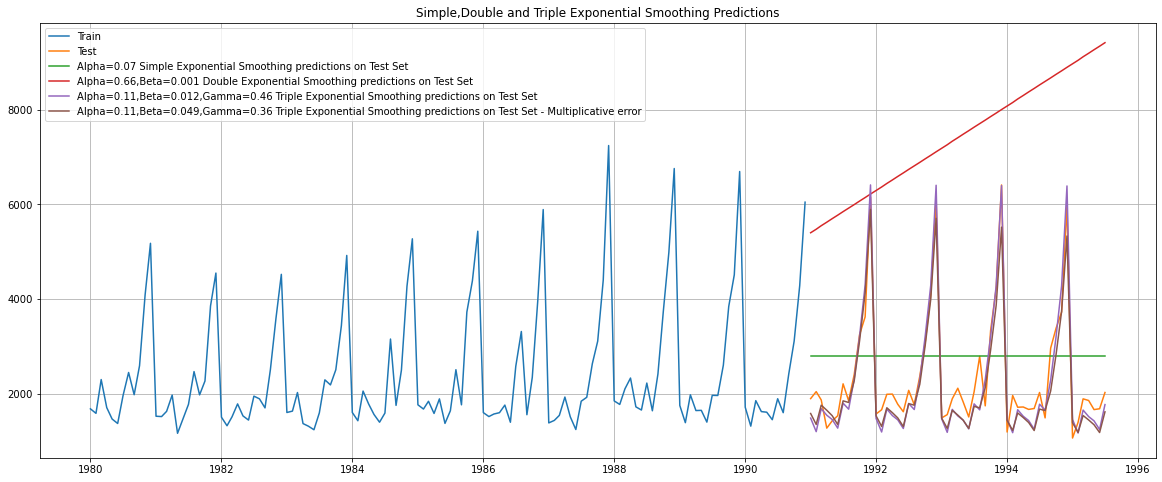

In [65]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.07 Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.66,Beta=0.001 Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.11,Beta=0.012,Gamma=0.46 Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.11,Beta=0.049,Gamma=0.36 Triple Exponential Smoothing predictions on Test Set - Multiplicative error')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

# Evaluate the TES model with multiplicative error using RMSE on the test data

In [66]:
TES_RMSE_am=mean_squared_error(TES_test.values,TES_predict_am.values,squared=False)
print('TES_AM RMSE VALUE',TES_RMSE_am)

TES_AM RMSE VALUE 402.9385298316925


In [67]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [TES_RMSE_am]},index=['Alpha=0.11,Beta=0.049,Gamma=0.36 TES_AM'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha = 0.07 SES                         1338.008384
Alpha=0.66,Beta=0.0001 DES               5291.879833
Alpha=0.11,Beta=0.012,Gamma=0.46 TES      378.626008
Alpha=0.11,Beta=0.049,Gamma=0.36 TES_AM   402.938530

We see that the multiplicative seasonality model has not done that well when compared to the additive seasonality Triple Exponential Smoothing model

# Model 5:Build a Simple Exponential Smoothing model by taking the best alpha [in the range of 0.01 to 1 taking an interval of 0.01] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command

In [68]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
resultsDf_model

Empty DataFrame
Columns: [Alpha Values, Test RMSE]
Index: []

In [69]:
from sklearn import metrics
for i in np.arange(0.01,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model2_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_model = resultsDf_model.append({'Alpha Values':i
                                              ,'Test RMSE':rmse_model2_test_i}, ignore_index=True)

In [70]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values    Test RMSE
1           0.02  1278.497798
0           0.01  1286.648058
2           0.03  1292.565292
3           0.04  1305.283075
4           0.05  1316.359347
..           ...          ...
94          0.95  3778.432623
95          0.96  3796.048620
96          0.97  3813.437370
97          0.98  3830.602869
98          0.99  3847.548965

[99 rows x 2 columns]

In [71]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][1]]}
                              ,index=['Alpha=0.02 Optimized SES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha = 0.07 SES                         1338.008384
Alpha=0.66,Beta=0.0001 DES               5291.879833
Alpha=0.11,Beta=0.012,Gamma=0.46 TES      378.626008
Alpha=0.11,Beta=0.049,Gamma=0.36 TES_AM   402.938530
Alpha=0.02 Optimized SES                 1278.497798

# Model 6: Build a Double Exponential Smoothing model by taking the best alpha and beta [both in the range of 0.01 to 1 taking an interval of 0.01] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command.

In [72]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(DES_train,initialization_method='estimated')

C:\Users\kpriyadh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [73]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Test RMSE': []})
resultsDf_model

Empty DataFrame
Columns: [Alpha Values, Beta Values, Test RMSE]
Index: []

In [74]:
for i in np.arange(0.01,1,0.01):
    for j in np.arange(0.01,1,0.01):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        
        rmse_model4_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j
                                          ,'Test RMSE':rmse_model4_test}, ignore_index=True)


In [75]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Beta Values     Test RMSE
136           0.02         0.38   1275.874751
135           0.02         0.37   1276.128575
106           0.02         0.08   1276.557274
258           0.03         0.61   1278.165214
201           0.03         0.04   1279.190198
...            ...          ...           ...
2175          0.22         0.97  60335.137630
2077          0.21         0.98  60589.909440
2176          0.22         0.98  60740.944863
2177          0.22         0.99  61104.415305
2078          0.21         0.99  61161.470620

[9801 rows x 3 columns]

In [76]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                              ,index=['Alpha=0.02,Beta=0.38 Optimized DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha = 0.07 SES                         1338.008384
Alpha=0.66,Beta=0.0001 DES               5291.879833
Alpha=0.11,Beta=0.012,Gamma=0.46 TES      378.626008
Alpha=0.11,Beta=0.049,Gamma=0.36 TES_AM   402.938530
Alpha=0.02 Optimized SES                 1278.497798
Alpha=0.02,Beta=0.38 Optimized DES       1275.874751

# Model 7: Build a Triple Exponential Smoothing model by taking the best alpha, beta and gamma [all in the range of 0.1 to 1 taking an interval of 0.1] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command.

In [77]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(TES_train,trend='additive',seasonal='additive',initialization_method='estimated')
## First we will define an empty dataframe to store our values from the loop

resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Test RMSE': []})
resultsDf_model

C:\Users\kpriyadh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Test RMSE]
Index: []

In [78]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
                
            rmse_model6_test_2 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
                    
            resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k
                                                  ,'Test RMSE':rmse_model6_test_2}, ignore_index=True)

In [79]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Beta Values  Gamma Values     Test RMSE
30            0.1          0.4           0.1  3.429347e+02
110           0.2          0.2           0.1  3.431214e+02
156           0.2          0.6           0.7  3.487924e+02
200           0.3          0.1           0.1  3.908348e+02
20            0.1          0.3           0.1  3.913042e+02
..            ...          ...           ...           ...
997           1.0          1.0           0.8  7.323386e+06
979           1.0          0.8           1.0  8.557936e+06
998           1.0          1.0           0.9  2.612667e+07
989           1.0          0.9           1.0  3.162683e+07
999           1.0          1.0           1.0  1.068247e+08

[1000 rows x 4 columns]

In [80]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                              ,index=['Alpha=0.1,Beta=0.4,Gamma=0.1:Optimized TES'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

Test RMSE
Alpha = 0.07 SES                            1338.008384
Alpha=0.66,Beta=0.0001 DES                  5291.879833
Alpha=0.11,Beta=0.012,Gamma=0.46 TES         378.626008
Alpha=0.11,Beta=0.049,Gamma=0.36 TES_AM      402.938530
Alpha=0.02 Optimized SES                    1278.497798
Alpha=0.02,Beta=0.38 Optimized DES          1275.874751
Alpha=0.1,Beta=0.4,Gamma=0.1:Optimized TES   342.934716

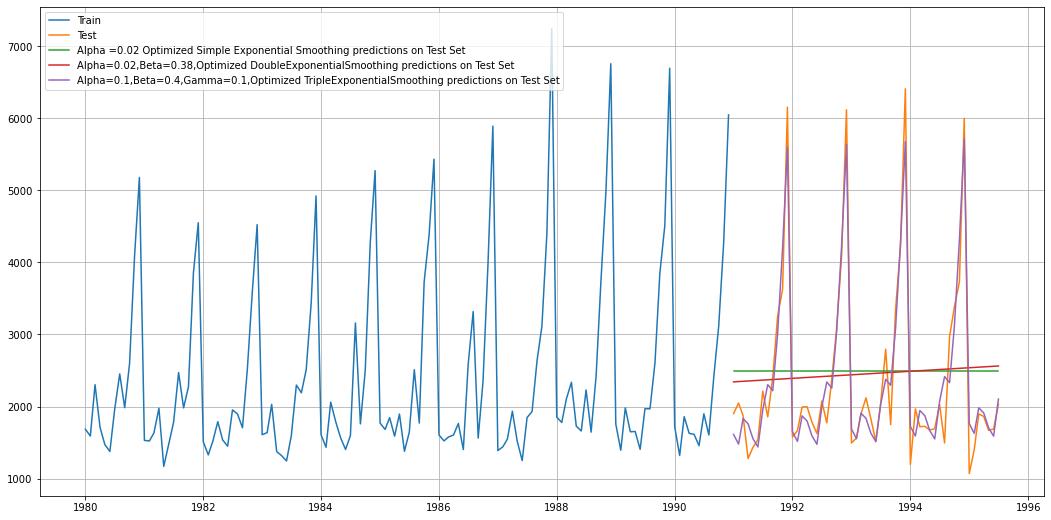

In [81]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python

plt.plot(SES_test['predict', 0.02], label='Alpha =0.02 Optimized Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict', 0.02, 0.38], label='Alpha=0.02,Beta=0.38,Optimized DoubleExponentialSmoothing predictions on Test Set')
plt.plot(TES_test['predict', 0.1, 0.4, 0.1], label='Alpha=0.1,Beta=0.4,Gamma=0.1,Optimized TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

# Building different models and comparing the accuracy metrics

### Model 1: Linear Regression

In [82]:
train    =   df[0:int(len(df)*0.71)] 
test     =   df[int(len(df)*0.71):]

In [83]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [84]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
Time_Stamp           
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Last few rows of Training Data


Sparkling
Time_Stamp           
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

First few rows of Test Data


Sparkling
Time_Stamp           
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

Last few rows of Test Data


Sparkling
Time_Stamp           
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

we are going to regress the 'Sparkling' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [85]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [86]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [87]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Sparkling  time
Time_Stamp                 
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5

Last few rows of Training Data


Sparkling  time
Time_Stamp                 
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132

First few rows of Test Data


Sparkling  time
Time_Stamp                 
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137

Last few rows of Test Data


Sparkling  time
Time_Stamp                 
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187

Now that our training and test data has been modified, let us go ahead use  𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛 to build the model on the training data and test the model on the test data.

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
lr = LinearRegression()

In [90]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

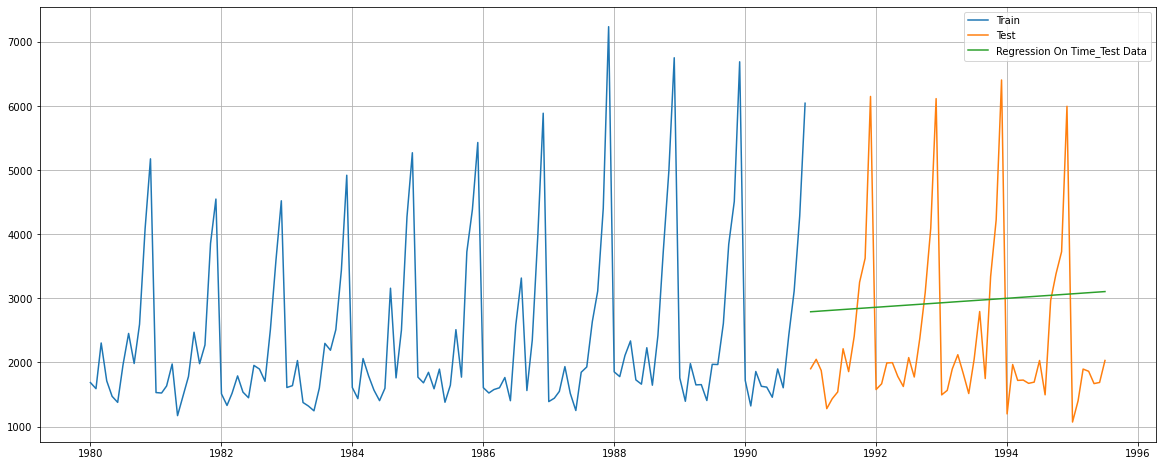

In [91]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

### Linear Regression Model Evaluation

In [92]:
rmse_Lin_Reg_model_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_Lin_Reg_model_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 


In [93]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_Lin_Reg_model_test]},index=['Linear RegressionOnTime'])

In [94]:
resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

Test RMSE
Alpha = 0.07 SES                            1338.008384
Alpha=0.66,Beta=0.0001 DES                  5291.879833
Alpha=0.11,Beta=0.012,Gamma=0.46 TES         378.626008
Alpha=0.11,Beta=0.049,Gamma=0.36 TES_AM      402.938530
Alpha=0.02 Optimized SES                    1278.497798
Alpha=0.02,Beta=0.38 Optimized DES          1275.874751
Alpha=0.1,Beta=0.4,Gamma=0.1:Optimized TES   342.934716
Linear RegressionOnTime                     1389.135175

# Model 8: Naive Approach:  

In [95]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [96]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

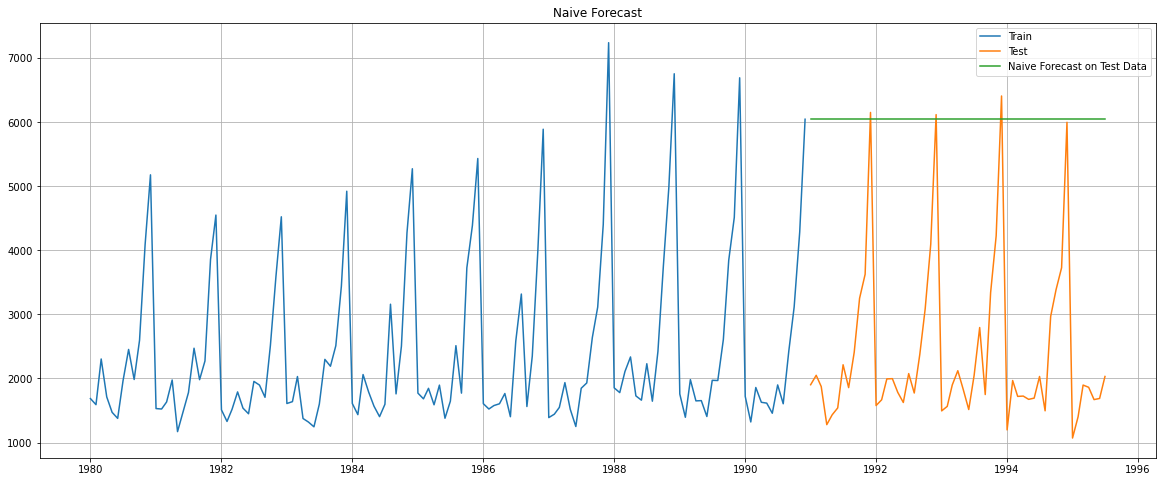

In [97]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [98]:
rmse_Naive_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For Naive model forecast on the Test Data,  RMSE is %3.3f" %(rmse_Naive_test))

For Naive model forecast on the Test Data,  RMSE is 3864.279


In [99]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_Naive_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

Test RMSE
Alpha = 0.07 SES                            1338.008384
Alpha=0.66,Beta=0.0001 DES                  5291.879833
Alpha=0.11,Beta=0.012,Gamma=0.46 TES         378.626008
Alpha=0.11,Beta=0.049,Gamma=0.36 TES_AM      402.938530
Alpha=0.02 Optimized SES                    1278.497798
Alpha=0.02,Beta=0.38 Optimized DES          1275.874751
Alpha=0.1,Beta=0.4,Gamma=0.1:Optimized TES   342.934716
Linear RegressionOnTime                     1389.135175
NaiveModel                                  3864.279352

# Method 9: Simple Average

In [100]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [101]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
Time_Stamp                          
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

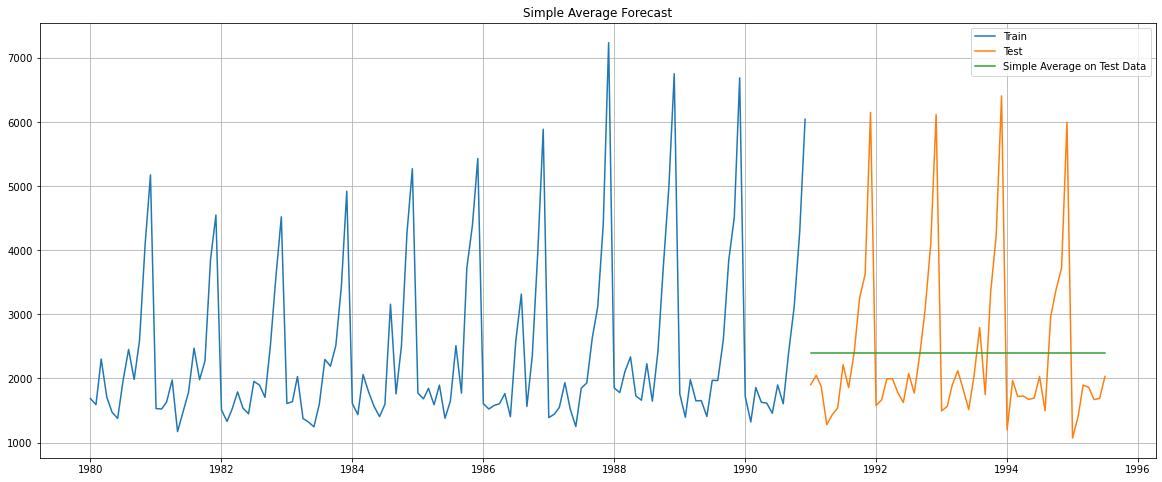

In [102]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Simple Average Model Evaluation

In [103]:
rmse_Sim_Avg_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_Sim_Avg_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [104]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_Sim_Avg_test]}
                           ,index=['Simple Average Model'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

Test RMSE
Alpha = 0.07 SES                            1338.008384
Alpha=0.66,Beta=0.0001 DES                  5291.879833
Alpha=0.11,Beta=0.012,Gamma=0.46 TES         378.626008
Alpha=0.11,Beta=0.049,Gamma=0.36 TES_AM      402.938530
Alpha=0.02 Optimized SES                    1278.497798
Alpha=0.02,Beta=0.38 Optimized DES          1275.874751
Alpha=0.1,Beta=0.4,Gamma=0.1:Optimized TES   342.934716
Linear RegressionOnTime                     1389.135175
NaiveModel                                  3864.279352
Simple Average Model                        1275.081804

# Method 10: Moving Average(MA)

In [105]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling
Time_Stamp           
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

### Trailing moving averages

In [106]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head(10)

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
Time_Stamp                                                             
1980-01-01       1686         NaN         NaN          NaN          NaN
1980-02-01       1591      1638.5         NaN          NaN          NaN
1980-03-01       2304      1947.5         NaN          NaN          NaN
1980-04-01       1712      2008.0     1823.25          NaN          NaN
1980-05-01       1471      1591.5     1769.50          NaN          NaN
1980-06-01       1377      1424.0     1716.00  1690.166667          NaN
1980-07-01       1966      1671.5     1631.50  1736.833333          NaN
1980-08-01       2453      2209.5     1816.75  1880.500000          NaN
1980-09-01       1984      2218.5     1945.00  1827.166667  1838.222222
1980-10-01       2596      2290.0     2249.75  1974.500000  1939.333333

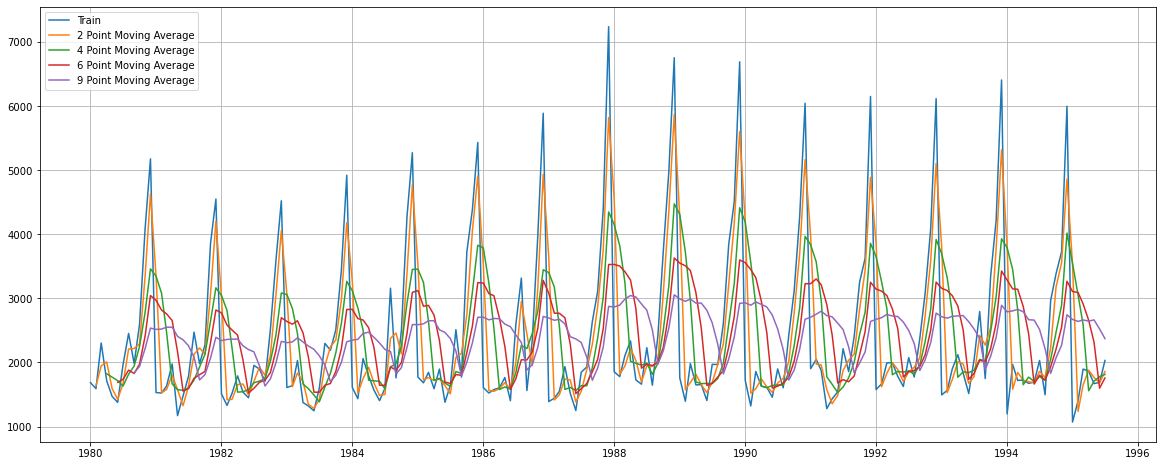

In [107]:
## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [108]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.71)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.71):]

In [109]:
trailing_MovingAverage_train.head()
trailing_MovingAverage_test.head()

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
Time_Stamp                                                             
1991-01-01       1902      3974.5     3837.75  3230.000000  2705.666667
1991-02-01       2049      1975.5     3571.00  3304.000000  2753.888889
1991-03-01       1874      1961.5     2968.00  3212.333333  2800.222222
1991-04-01       1279      1576.5     1776.00  2906.166667  2731.333333
1991-05-01       1432      1355.5     1658.50  2430.500000  2712.111111

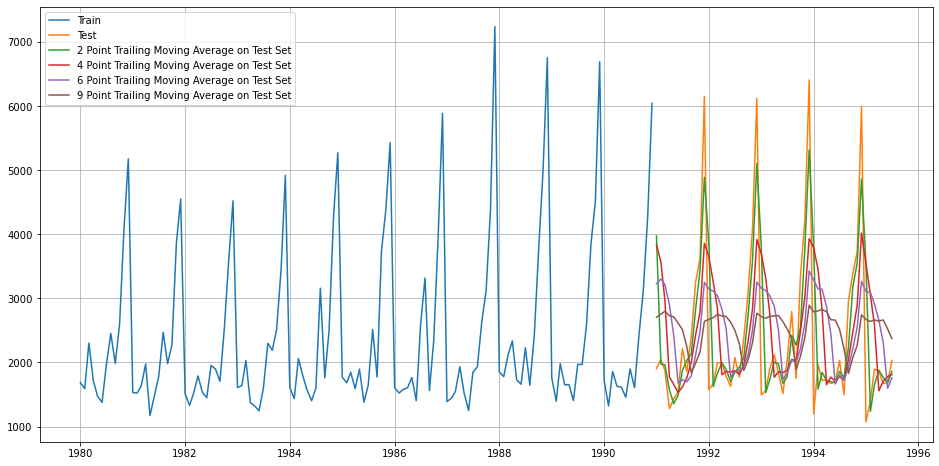

In [110]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

### Model Evaluation on the test data

In [111]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_Moving_Avg_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_Moving_Avg_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_Moving_Avg_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_Moving_Avg_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_Moving_Avg_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_Moving_Avg_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_Moving_Avg_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_Moving_Avg_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278


In [112]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_Moving_Avg_test_2,rmse_Moving_Avg_test_4
                                          ,rmse_Moving_Avg_test_6,rmse_Moving_Avg_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

Test RMSE
Alpha = 0.07 SES                            1338.008384
Alpha=0.66,Beta=0.0001 DES                  5291.879833
Alpha=0.11,Beta=0.012,Gamma=0.46 TES         378.626008
Alpha=0.11,Beta=0.049,Gamma=0.36 TES_AM      402.938530
Alpha=0.02 Optimized SES                    1278.497798
Alpha=0.02,Beta=0.38 Optimized DES          1275.874751
Alpha=0.1,Beta=0.4,Gamma=0.1:Optimized TES   342.934716
Linear RegressionOnTime                     1389.135175
NaiveModel                                  3864.279352
Simple Average Model                        1275.081804
2pointTrailingMovingAverage                  813.400684
4pointTrailingMovingAverage                 1156.589694
6pointTrailingMovingAverage                 1283.927428
9pointTrailingMovingAverage                 1346.278315

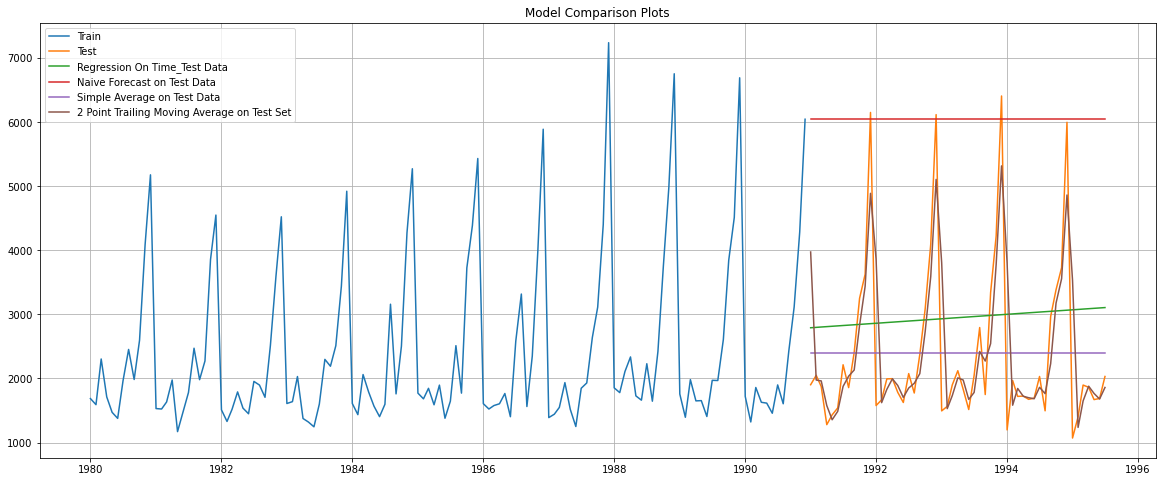

In [113]:
## Plotting on both Training and Test data

plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

# 5. Check for the stationarity of the Train data

In [114]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

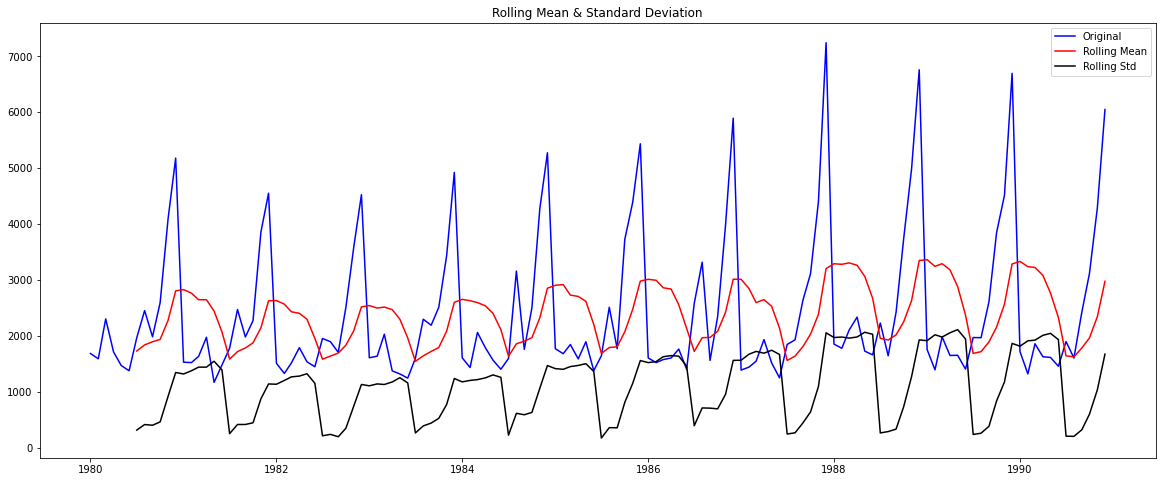

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [115]:
test_stationarity(train['Sparkling'])

We see that at 5% significant level the Time Series is non-stationary as'p' value is 0.6 which is greater than α  = 0.05. 

We need to use appropriate measures of differencing to stationarize the data

### Let us take a difference of order 1 and check whether the Time Series is stationary or not.

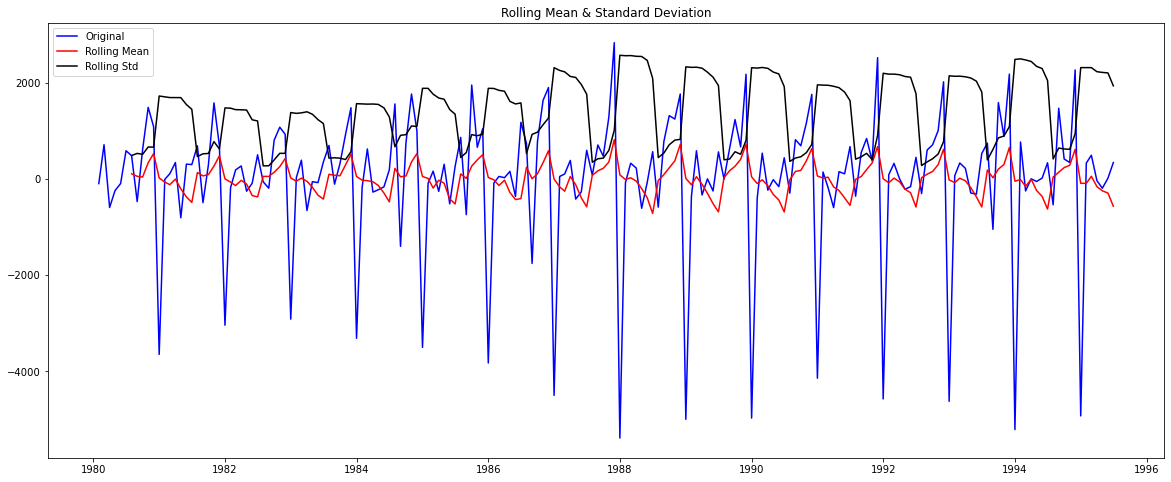

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [116]:
test_stationarity(df['Sparkling'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at  𝛼  = 0.05

We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there.

In [117]:
import itertools
p = q = range(0, 3)
d= range(0,1)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 5)
Model: (0, 0, 1)(0, 0, 2, 5)
Model: (0, 0, 2)(1, 0, 0, 5)
Model: (0, 0, 2)(1, 0, 1, 5)


# Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

As the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models.

In [118]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [119]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [120]:
import warnings 
warnings. filterwarnings('ignore') 

In [121]:
## Let's start by building ARIMA model -- Although the data set has some seasonality and hence ARIMA is 
## not the right option Reason for making the model is to understand how different the model could be if seasonality is not considered

from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
            try:
                mod = ARIMA(train['Sparkling'], order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906438611577
ARIMA(0, 1, 2) - AIC:2232.78309768405
ARIMA(1, 1, 0) - AIC:2268.5280607650034
ARIMA(1, 1, 1) - AIC:2235.0139453511238
ARIMA(1, 1, 2) - AIC:2233.59764711907
ARIMA(2, 1, 0) - AIC:2262.035600155025
ARIMA(2, 1, 1) - AIC:2232.360489884417
ARIMA(2, 1, 2) - AIC:2210.618562220438


In [122]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)


param          AIC
8  (2, 1, 2)  2210.618562
7  (2, 1, 1)  2232.360490
2  (0, 1, 2)  2232.783098
5  (1, 1, 2)  2233.597647
4  (1, 1, 1)  2235.013945
6  (2, 1, 0)  2262.035600
1  (0, 1, 1)  2264.906439
3  (1, 1, 0)  2268.528061
0  (0, 1, 0)  2269.582796

In [123]:
## ARIMA(2,1,2) has the lowest AIC
mod = ARIMA(train['Sparkling'], order=(2,1,2))

results_Arima = mod.fit()

print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.730
Date:                Sun, 25 Jul 2021   AIC                           2210.619
Time:                        12:19:17   BIC                           2227.870
Sample:                    02-01-1980   HQIC                          2217.628
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5843      0.518     10.790      0.000       4.570       6.599
ar.L1.D.Sparkling     1.2700      0.074     17.048      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

In [124]:
pred_ARIMA = results_Arima.forecast(steps=len(test))
pred_ARIMA[0]

array([4247.05825926, 2817.9768025 , 2013.19673023, 1793.49651506,
       1967.04715861, 2312.19477265, 2654.92015309, 2898.4147373 ,
       3017.23892555, 3033.32997706, 2988.80431684, 2924.85919641,
       2870.21706884, 2838.27187618, 2829.93990281, 2838.87957013,
       2856.52333992, 2875.54354956, 2891.43455324, 2902.58003205,
       2909.45192712, 2913.55533062, 2916.5373267 , 2919.64640917,
       2923.54527843, 2928.37600048, 2933.94766121, 2939.93818411,
       2946.04549597, 2952.06642559, 2957.91220299, 2963.58393335,
       2969.13276253, 2974.62302889, 2980.10778551, 2985.61836019,
       2991.1648124 , 2996.74236357, 3002.33930785, 3007.94345597,
       3013.54588636, 3019.14209847, 3024.73137561, 3030.31532945,
       3035.89640844, 3041.47681917, 3047.0579921 , 3052.64050752,
       3058.22430085, 3063.80896495, 3069.39401886, 3074.97907992,
       3080.56393165, 3086.14851348, 3091.73286985])

### ARIMA Model Evaluation

In [125]:
from math import sqrt
from sklearn.metrics import  mean_squared_error
rmse = sqrt(mean_squared_error(test.Sparkling,pred_ARIMA[0]))
print('RMSE of ARIMA model',rmse)

RMSE of ARIMA model 1374.546023727508


In [126]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(2, 1, 2)'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

Test RMSE
Alpha = 0.07 SES                            1338.008384
Alpha=0.66,Beta=0.0001 DES                  5291.879833
Alpha=0.11,Beta=0.012,Gamma=0.46 TES         378.626008
Alpha=0.11,Beta=0.049,Gamma=0.36 TES_AM      402.938530
Alpha=0.02 Optimized SES                    1278.497798
Alpha=0.02,Beta=0.38 Optimized DES          1275.874751
Alpha=0.1,Beta=0.4,Gamma=0.1:Optimized TES   342.934716
Linear RegressionOnTime                     1389.135175
NaiveModel                                  3864.279352
Simple Average Model                        1275.081804
2pointTrailingMovingAverage                  813.400684
4pointTrailingMovingAverage                 1156.589694
6pointTrailingMovingAverage                 1283.927428
9pointTrailingMovingAverage                 1346.278315
ARIMA(2, 1, 2)                              1374.546024

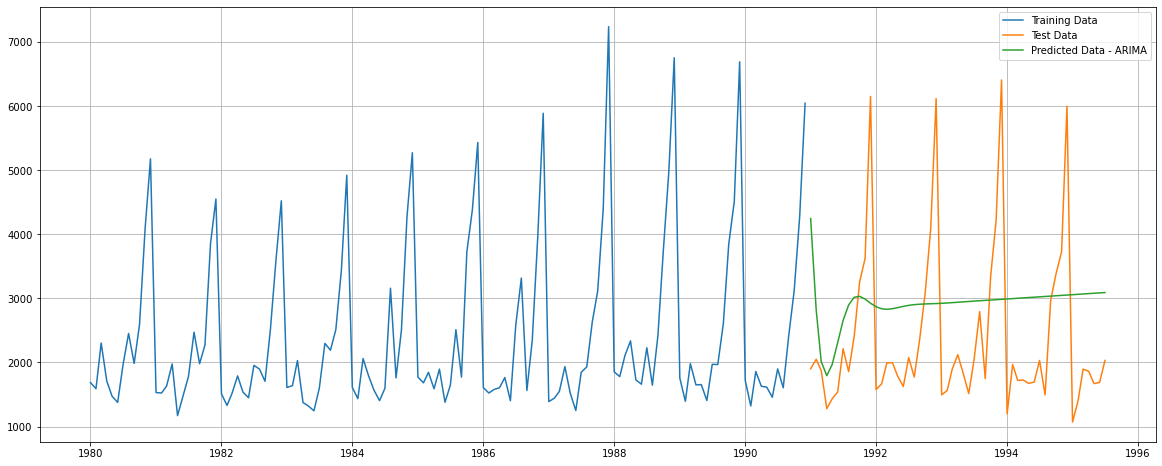

In [127]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

# Build an SARIMA model

Let us look at the ACF plot to understand the seasonal parameter for the SARIMA model.

In [128]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

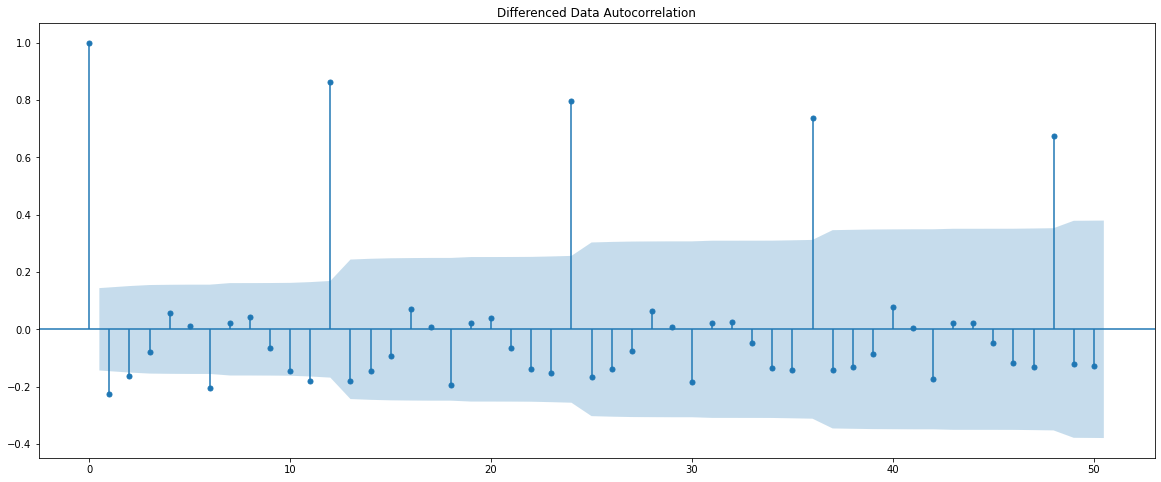

In [129]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 12. We will run our auto SARIMA models by setting seasonality at 12.

### Setting the seasonality as 12 for the first iteration of the auto SARIMA model.¶

In [130]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [131]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [132]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616846013
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640236748
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301388796
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791871
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158610893
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920836
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505825
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566526
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089573264204
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838495
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.090319377595
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144030938
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954177198
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085400543
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018826079407
SARIMA(0, 1

In [133]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584248
53  (1, 1, 2)  (2, 0, 2, 12)  1556.076790
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121579
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340402

In [134]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 25 Jul 2021   AIC                           1555.584
Time:                                    12:21:00   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6283      0.255     -2.464      0.014      -1.128      -0.128
ma.L1         -0.1040      0.225   

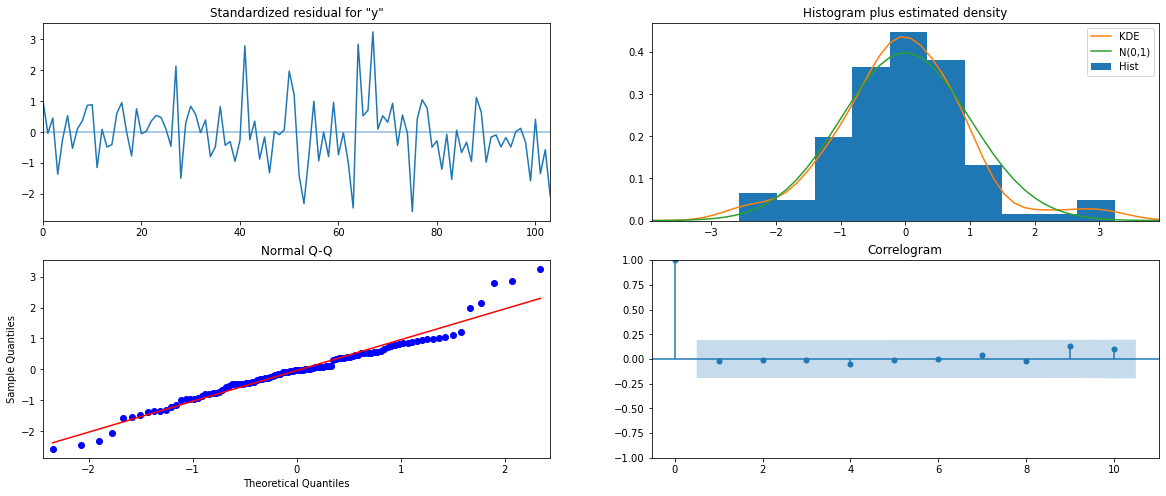

In [135]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.

### Predict on the Test Set using this model and evaluate the model.

In [136]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [137]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.420690  388.340435     566.287424    2088.553956
1  1315.131011  401.998581     527.228271    2103.033752
2  1621.592088  401.992199     833.701856    2409.482321
3  1598.894150  407.229343     800.739304    2397.048996
4  1392.700709  407.958777     593.116199    2192.285219

In [138]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print('RMSE of SARIMA model',rmse)

RMSE of SARIMA model 528.6113639398799


In [139]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(1,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
Alpha = 0.07 SES                            1338.008384
Alpha=0.66,Beta=0.0001 DES                  5291.879833
Alpha=0.11,Beta=0.012,Gamma=0.46 TES         378.626008
Alpha=0.11,Beta=0.049,Gamma=0.36 TES_AM      402.938530
Alpha=0.02 Optimized SES                    1278.497798
Alpha=0.02,Beta=0.38 Optimized DES          1275.874751
Alpha=0.1,Beta=0.4,Gamma=0.1:Optimized TES   342.934716
Linear RegressionOnTime                     1389.135175
NaiveModel                                  3864.279352
Simple Average Model                        1275.081804
2pointTrailingMovingAverage                  813.400684
4pointTrailingMovingAverage                 1156.589694
6pointTrailingMovingAverage                 1283.927428
9pointTrailingMovingAverage                 1346.278315
ARIMA(2, 1, 2)                              1374.546024
SARIMA(1,1,2)(1,0,2,12)                      528.611364

# Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

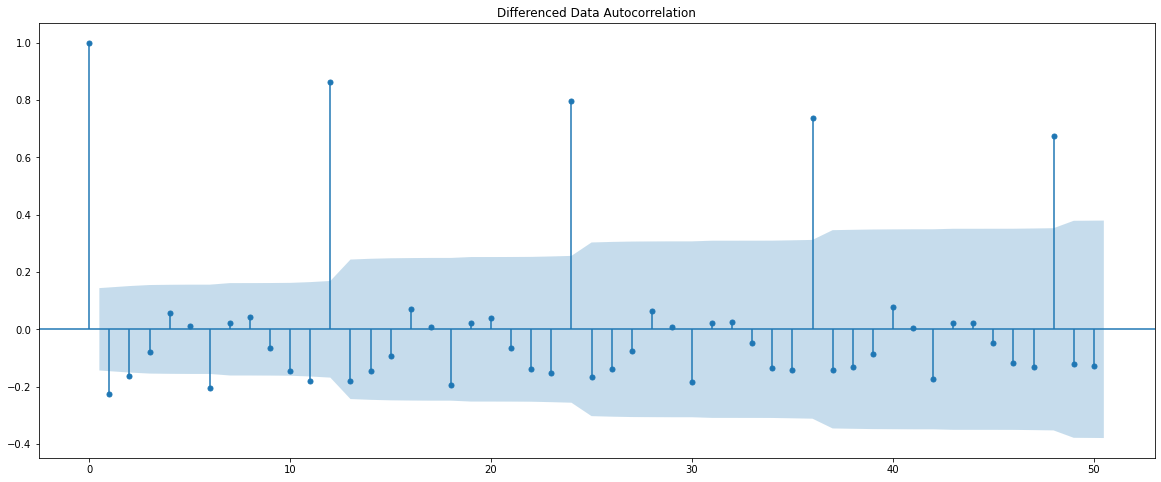

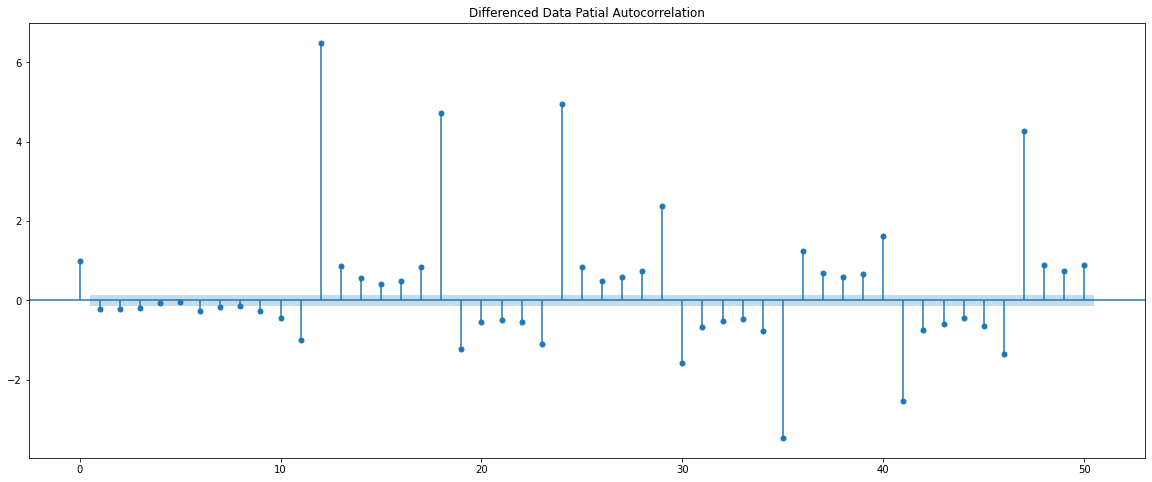

In [140]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()


Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 3.
The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.
By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.

In [141]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


In [142]:
manual_ARIMA = ARIMA(train['Sparkling'],order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.730
Date:                Sun, 25 Jul 2021   AIC                           2210.619
Time:                        12:21:04   BIC                           2227.870
Sample:                    02-01-1980   HQIC                          2217.628
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5843      0.518     10.790      0.000       4.570       6.599
ar.L1.D.Sparkling     1.2700      0.074     17.048      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

In [143]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [144]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print('RMSE of manual ARIMA (2,1,2)',rmse)

RMSE of manual ARIMA (2,1,2) 1374.546023727508


In [145]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Manual ARIMA(2,1,2)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
Alpha = 0.07 SES                            1338.008384
Alpha=0.66,Beta=0.0001 DES                  5291.879833
Alpha=0.11,Beta=0.012,Gamma=0.46 TES         378.626008
Alpha=0.11,Beta=0.049,Gamma=0.36 TES_AM      402.938530
Alpha=0.02 Optimized SES                    1278.497798
Alpha=0.02,Beta=0.38 Optimized DES          1275.874751
Alpha=0.1,Beta=0.4,Gamma=0.1:Optimized TES   342.934716
Linear RegressionOnTime                     1389.135175
NaiveModel                                  3864.279352
Simple Average Model                        1275.081804
2pointTrailingMovingAverage                  813.400684
4pointTrailingMovingAverage                 1156.589694
6pointTrailingMovingAverage                 1283.927428
9pointTrailingMovingAverage                 1346.278315
ARIMA(2, 1, 2)                              1374.546024
SARIMA(1,1,2)(1,0,2,12)                      528.611364
Manual ARIMA(2,1,2)                         1374.546024

# Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12

Let us look at the ACF and the PACF plots once more.

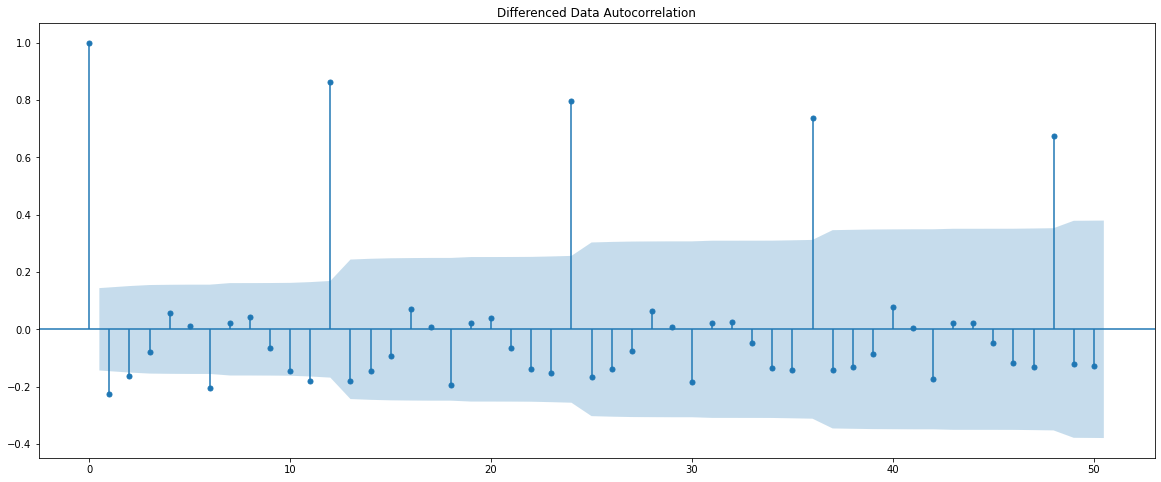

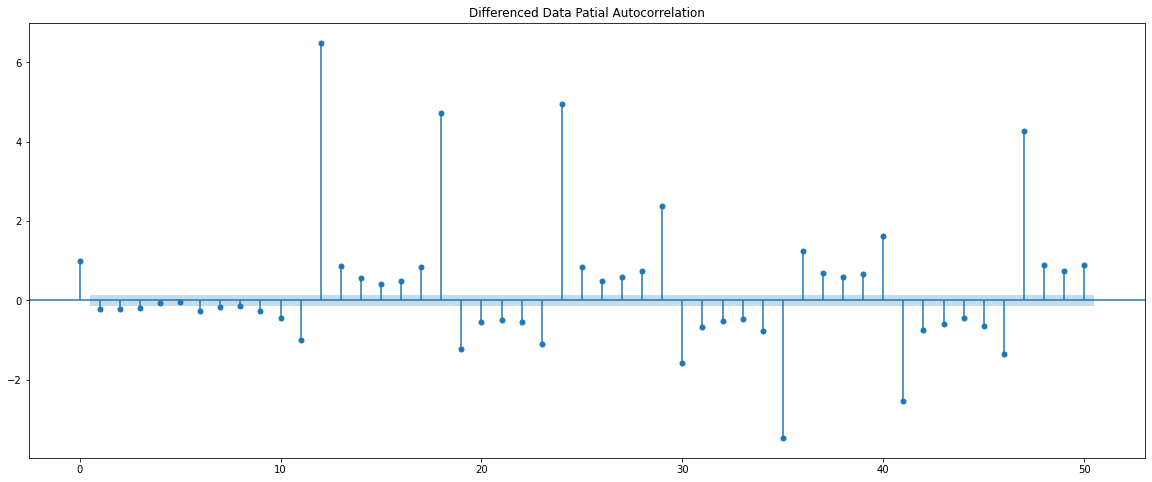

In [146]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (12) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

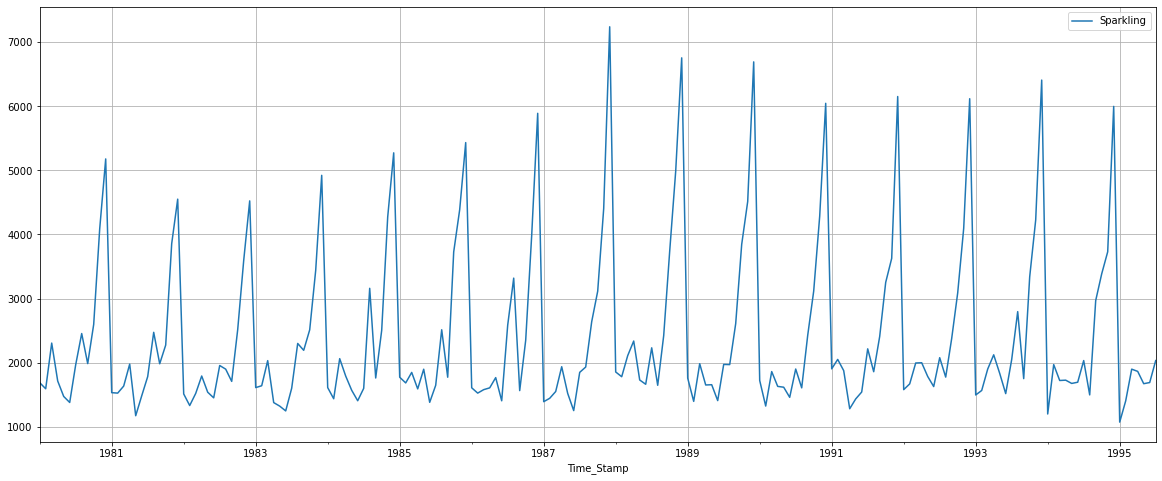

In [147]:
df.plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series

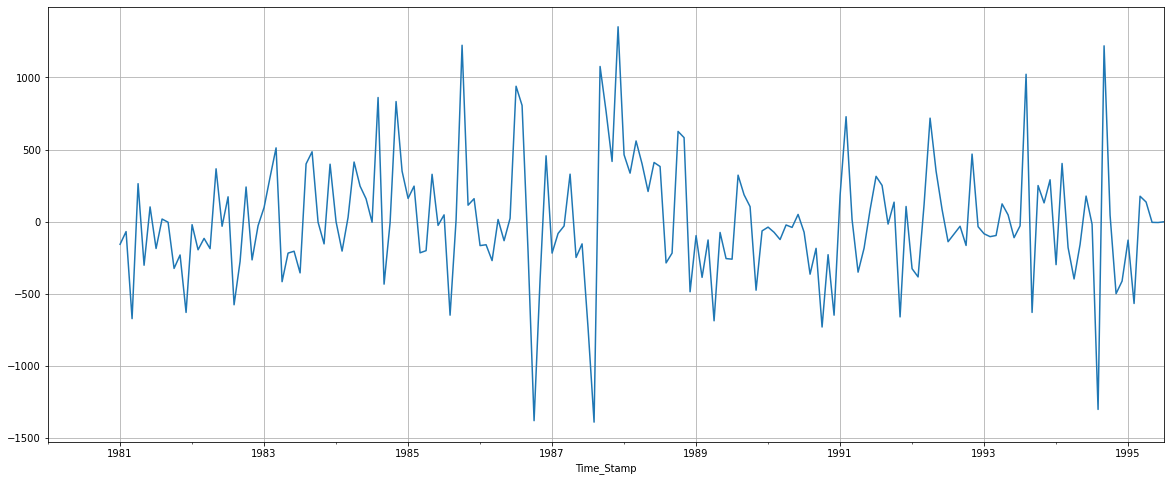

In [148]:
(df['Sparkling'].diff(12)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

<AxesSubplot:xlabel='Time_Stamp'>

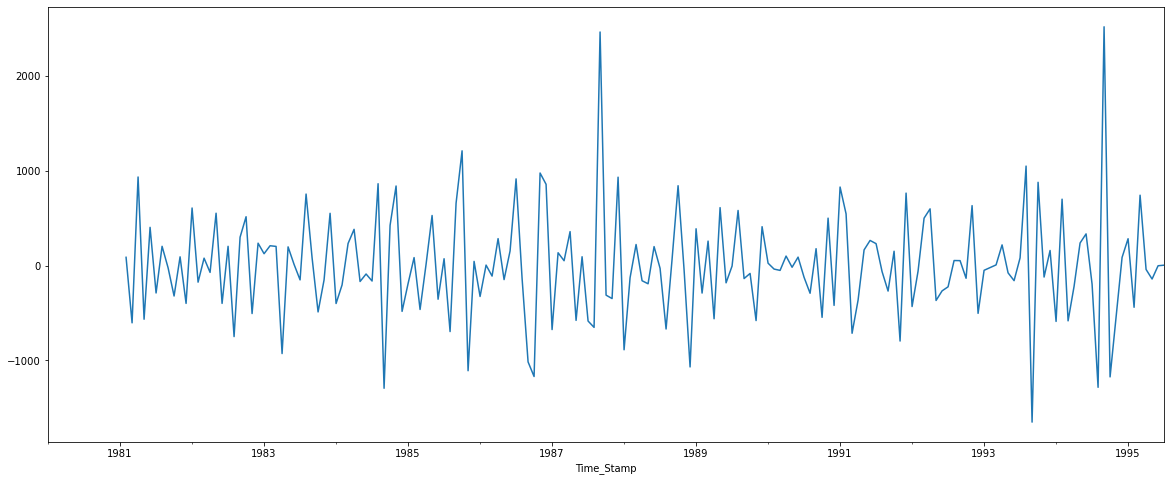

In [149]:
(df['Sparkling'].diff(12)).diff().plot()

Now we see that there is almost no trend present in the data. Seasonality is only present in the data

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

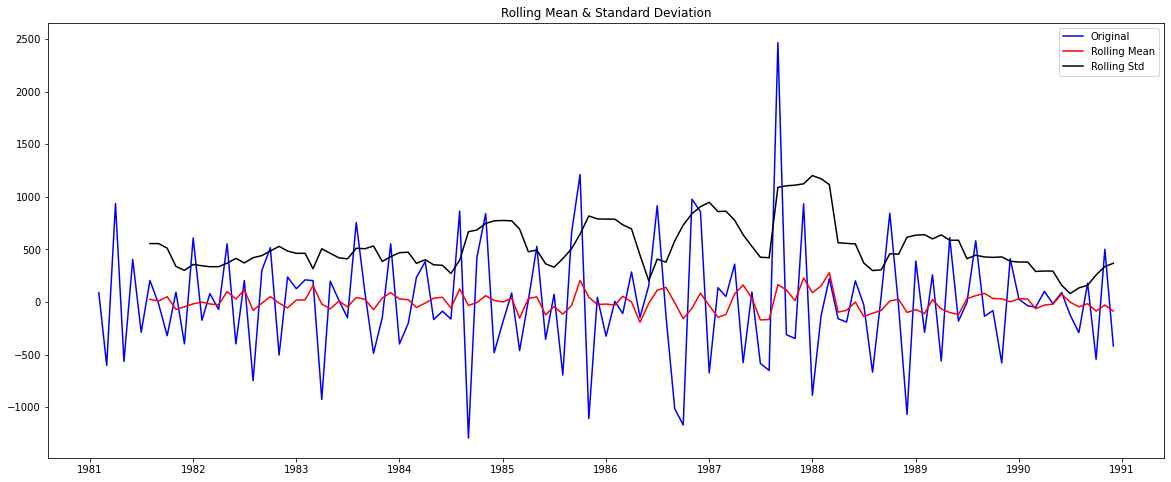

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [150]:
test_stationarity((train['Sparkling'].diff(12).dropna()).diff(1).dropna())

From the p-value we see that the time series is stationary and now SARIMA can be applied to the dataset

Checking the ACF and the PACF plots for the new modified Time Series.

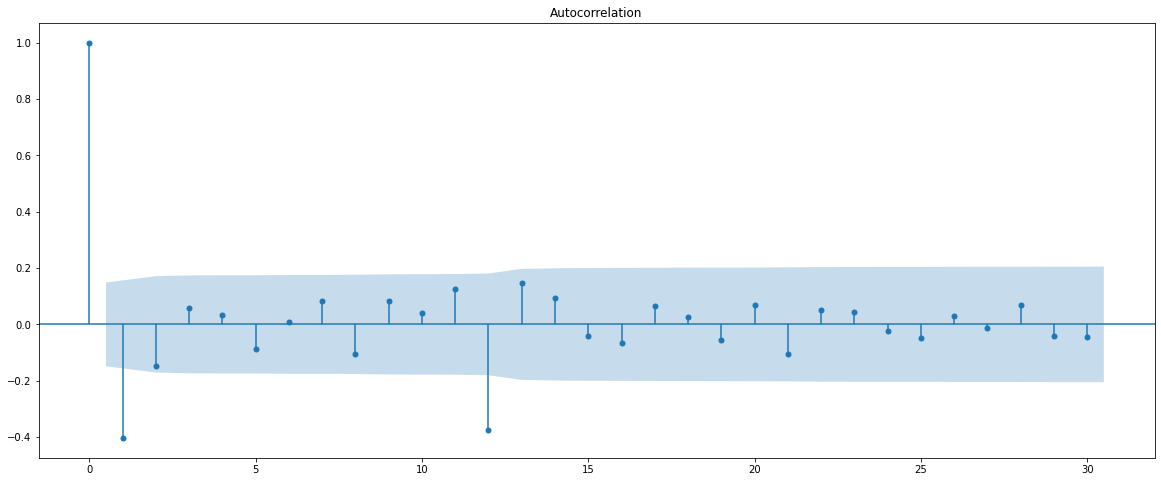

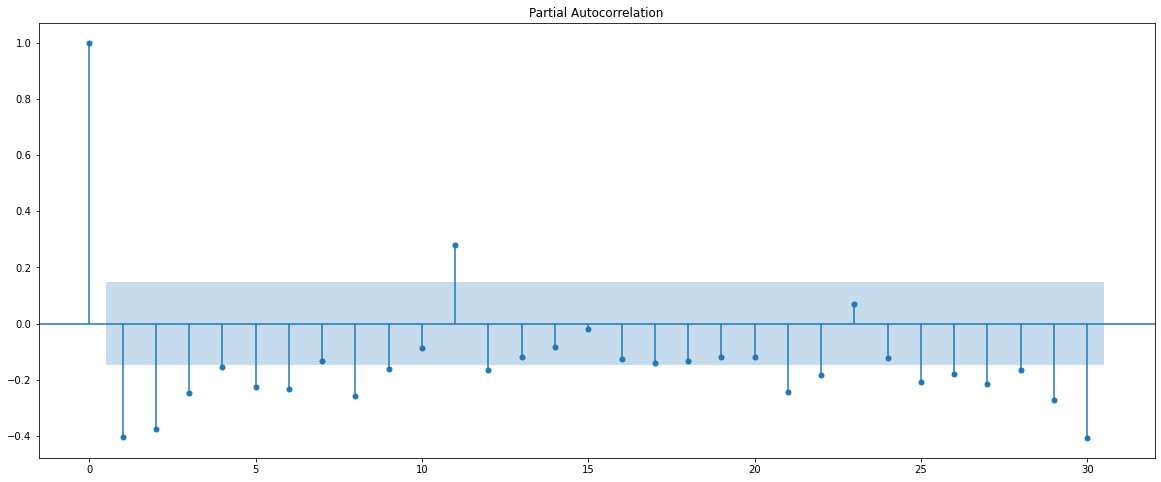

In [151]:
plot_acf((df['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=30);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12.
We will keep the p(2) and q(2) parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0.
Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).

By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.

This is a common problem while building models by looking at the ACF and the PACF plots. But we are able to explain the model. 

Please do play around with the data and try out different kinds of transformations and different levels of differencing on this data. We have not taken the logarithm of the series and then trying it out.

In [152]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(0, 1, 0),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(2, 1, [1, 2], 12)   Log Likelihood                -722.996
Date:                                 Sun, 25 Jul 2021   AIC                           1455.991
Time:                                         12:21:11   BIC                           1468.708
Sample:                                              0   HQIC                          1461.128
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.2445      0.879     -0.278      0.781      -1.967       1

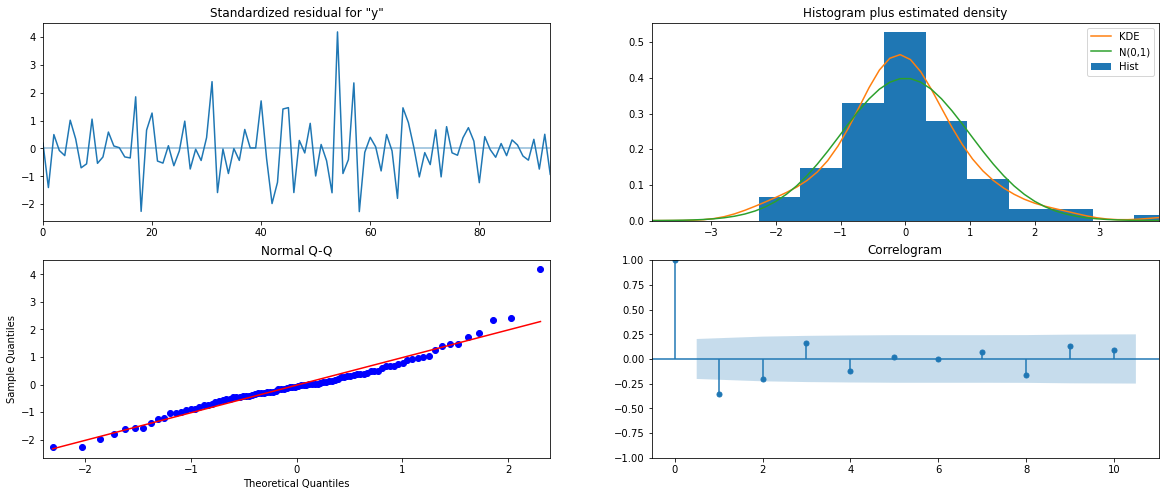

In [153]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

# Predict on the Test Set using this model and evaluate the model.

In [154]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [155]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean      mean_se  mean_ci_lower  mean_ci_upper
0   983.872042   529.706848     -54.334303    2022.078387
1   661.355407   749.118609    -806.890087    2129.600900
2  1161.271823   917.479174    -636.954315    2959.497961
3  1016.216154  1059.413697   -1060.196536    3092.628844
4   877.116434  1184.460521   -1444.383529    3198.616396

In [156]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print('RMSE Manual SARIMA',rmse)

RMSE Manual SARIMA 1757.7266967386927


In [157]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0,1,0)(2,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
Alpha = 0.07 SES                            1338.008384
Alpha=0.66,Beta=0.0001 DES                  5291.879833
Alpha=0.11,Beta=0.012,Gamma=0.46 TES         378.626008
Alpha=0.11,Beta=0.049,Gamma=0.36 TES_AM      402.938530
Alpha=0.02 Optimized SES                    1278.497798
Alpha=0.02,Beta=0.38 Optimized DES          1275.874751
Alpha=0.1,Beta=0.4,Gamma=0.1:Optimized TES   342.934716
Linear RegressionOnTime                     1389.135175
NaiveModel                                  3864.279352
Simple Average Model                        1275.081804
2pointTrailingMovingAverage                  813.400684
4pointTrailingMovingAverage                 1156.589694
6pointTrailingMovingAverage                 1283.927428
9pointTrailingMovingAverage                 1346.278315
ARIMA(2, 1, 2)                              1374.546024
SARIMA(1,1,2)(1,0,2,12)                      528.611364
Manual ARIMA(2,1,2)                         1374.546024
SARIMA(0,1,0)(2,1,2,12)                     1757.726697

# 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [158]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood               -1173.399
Date:                            Sun, 25 Jul 2021   AIC                           2360.798
Time:                                    12:21:15   BIC                           2382.281
Sample:                                01-01-1980   HQIC                          2369.522
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8322      0.079    -10.517      0.000      -0.987      -0.677
ma.L2         -0.1231      0.082   

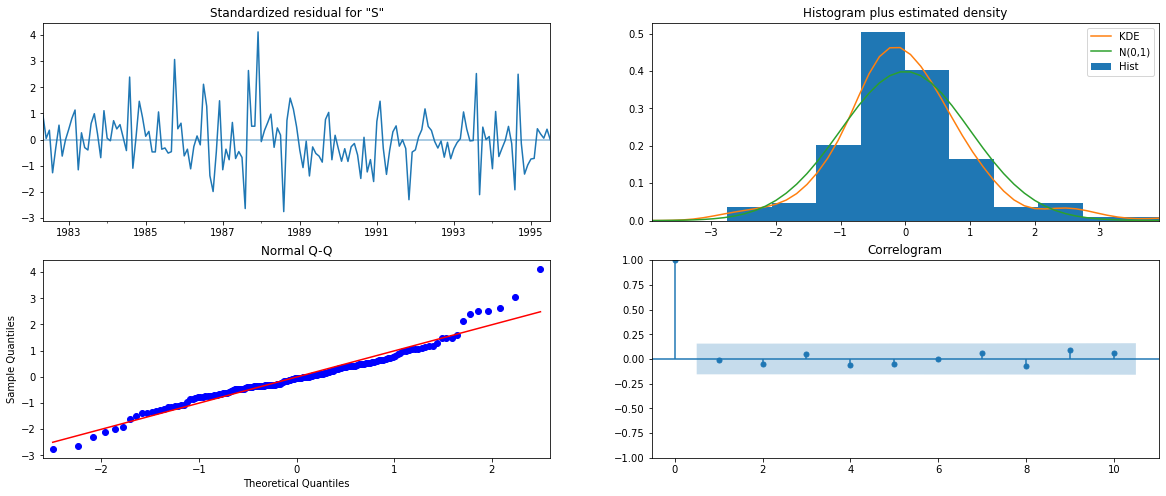

In [159]:
results_full_data_model.plot_diagnostics();

# Evaluate the model on the whole and predict 12 months into the future with appropriate confidence intervals/bands.

In [160]:
predicted_manual_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=17)

In [161]:
predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  1865.472211  382.998824    1114.808309    2616.136113
1995-09-01  2461.843840  388.355821    1700.680418    3223.007261
1995-10-01  3319.045384  388.734183    2557.140386    4080.950383
1995-11-01  4017.377079  389.112178    3254.731225    4780.022933
1995-12-01  6281.441399  389.489807    5518.055405    7044.827393

In [162]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 524.6502508543183


In [163]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Full Model SARIMA(0,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
Alpha = 0.07 SES                            1338.008384
Alpha=0.66,Beta=0.0001 DES                  5291.879833
Alpha=0.11,Beta=0.012,Gamma=0.46 TES         378.626008
Alpha=0.11,Beta=0.049,Gamma=0.36 TES_AM      402.938530
Alpha=0.02 Optimized SES                    1278.497798
Alpha=0.02,Beta=0.38 Optimized DES          1275.874751
Alpha=0.1,Beta=0.4,Gamma=0.1:Optimized TES   342.934716
Linear RegressionOnTime                     1389.135175
NaiveModel                                  3864.279352
Simple Average Model                        1275.081804
2pointTrailingMovingAverage                  813.400684
4pointTrailingMovingAverage                 1156.589694
6pointTrailingMovingAverage                 1283.927428
9pointTrailingMovingAverage                 1346.278315
ARIMA(2, 1, 2)                              1374.546024
SARIMA(1,1,2)(1,0,2,12)                      528.611364
Manual ARIMA(2,1,2)                         1374.546024
SARIMA(0,1,0)(2,1,2,12)                     1757.726697
Full Model SARIMA(0,1,2)(2,0,2,12)           524.650251

In [164]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-12-31', freq='M'))

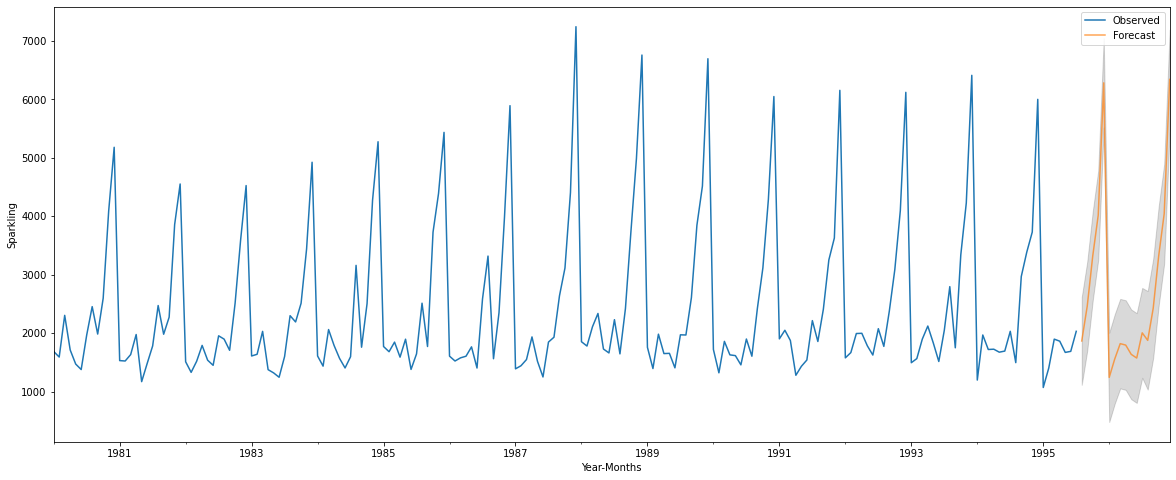

In [165]:
# plot the forecast along with the confidence band

axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()